In [ ]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 450kB 52.1MB/s 
     |████████████████████████████████| 3.8MB 58.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=e4ca57d677d702938eb32569bb35b626ed4d3f0e73852f02ed5d8fd9951f3e82
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Fo

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.0.0'

**Set the Pertubation values**<br>
per1 is the pertubation value for mnist model 1<br>
per2 is the pertubation value for mnist model 2<br>
per3 is the pertubation value for cifar model 1<br>
per4 is the pertubation value for cifar model 2<br>

In [ ]:
per1=0.5
per2=0.5
per3=0.05
per4=0.1

**Import Dataset**

In [ ]:
mnist = tf.keras.datasets.mnist
cifar = tf.keras.datasets.cifar10

**Load Dataset into variables and normalize it between 0 and 1**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
(x_train1, y_train1), (x_test1, y_test1) = cifar.load_data()
x_train1, x_test1 = x_train1 / 255.0, x_test1 / 255.0

In [ ]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train1.shape

(50000, 32, 32, 3)

**Load Trained models**

In [ ]:
model1=tf.keras.models.load_model('m1.h5')
model2=tf.keras.models.load_model('m2.h5')
model3=tf.keras.models.load_model('m3.h5')
model4=tf.keras.models.load_model('m4.h5')

**Model Summary**

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)         

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 128)        

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 256)        

**Function to generate Adverserial Patterns**<br>
Loss used is CrossEntropy<br>
Gradient Tape is used to find the current gradient(essentially the derivatives) of the trained model<br>
Tape.watch() is used to define the variable with which we take the derivative.<br>
Examples take derivative of loss wrt input image


In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern_mnist(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model1(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

def create_adversarial_pattern_cifar(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model3(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Next 2 cells are just examples of applying the pertubation on single images**

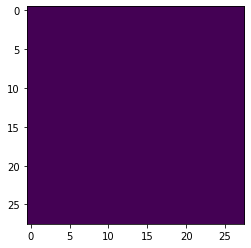

In [ ]:
perturbations = create_adversarial_pattern_mnist(tf.convert_to_tensor(x_test[0].reshape(1,28,28,1)), y_test[0])
plt.imshow(np.squeeze(perturbations[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


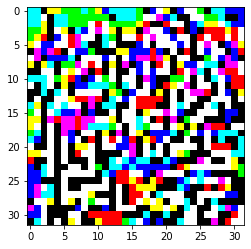

In [ ]:
perturbations = create_adversarial_pattern_cifar(tf.convert_to_tensor(x_test1[0].reshape(1,32,32,3)), y_test1[0])
plt.imshow(np.squeeze(perturbations[0]))

**Adverserial Test Set**

In [ ]:
adv_test_set_1_mnist=np.empty([10000,28,28,1])
adv_test_set_2_mnist=np.empty([10000,28,28,1])
adv_test_set_1_cifar=np.empty([10000,32,32,3])
adv_test_set_2_cifar=np.empty([10000,32,32,3])

In [ ]:
for i in range(10000):
  p1=create_adversarial_pattern_mnist(tf.convert_to_tensor(x_test[i].reshape(1,28,28,1)), y_test[i])
  adv_test_set_1_mnist[i]=x_test[i]+(per1* p1)
  adv_test_set_1_mnist[i] = tf.clip_by_value(adv_test_set_1_mnist[i], 0, 1)
  adv_test_set_2_mnist[i]=x_test[i]+(per2* p1)
  adv_test_set_2_mnist[i] = tf.clip_by_value(adv_test_set_2_mnist[i], 0, 1)

  p2=create_adversarial_pattern_cifar(tf.convert_to_tensor(x_test1[i].reshape(1,32,32,3)), y_test1[i])
  adv_test_set_1_cifar[i]=x_test1[i]+(per3* p2)
  adv_test_set_1_cifar[i] = tf.clip_by_value(adv_test_set_1_cifar[i], 0, 1)
  adv_test_set_2_cifar[i]=x_test1[i]+(per4* p2)
  adv_test_set_2_cifar[i] = tf.clip_by_value(adv_test_set_2_cifar[i], 0, 1)
  if i%500==0:
    print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [ ]:
adv_test_set_1_mnist[0].shape

(28, 28, 1)

In [ ]:
x=model1.predict(adv_test_set_1_mnist[10].reshape(1,28,28,1))
x[0]

array([1.0000000e+00, 4.3782328e-25, 3.4156885e-21, 1.8723431e-28,
       3.5811566e-27, 5.7600008e-24, 1.1238839e-23, 2.9336596e-25,
       3.7824958e-21, 2.1056748e-16], dtype=float32)

**Adverserial examples from original test set Mnist**

In [ ]:
count=0
t=[]
#plt.figure()
for i in range(100):
  a1=model1.predict(x_test[i].reshape(1,28,28,1))
  a2=model2.predict(x_test[i].reshape(1,28,28,1))
  n1=np.argmax(a1)
  n2=np.argmax(a2)
  if n1!=n2:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_mnist[i]))
    plt.show()
    print("Prediction by model 1 is ",n1," and Prediction by model 2 is ",n2," Thus this is an adverserial example")
    
  elif abs(a1[0][n1]-a2[0][n2])>0.05:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_mnist[i]))
    plt.show()
    print("Prediction by model 1 is ",a1[0][n1]," and Prediction by model 2 is ",a2[0][n2]," Since the difference b/w prediction is greater than threshold this is an adverserial example")
    #print(a1[0][n1]," and ",a2[0][n2])

In [ ]:
print("The number of adverserial examples in original test set is", count)

The number of adverserial examples in original test set is 0


**Adverserial examples from adverserial test set 1 Mnist**

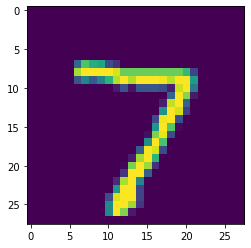

This is not an adversarial example


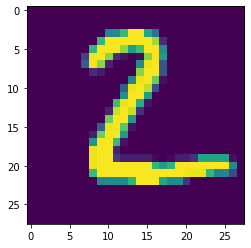

This is not an adversarial example


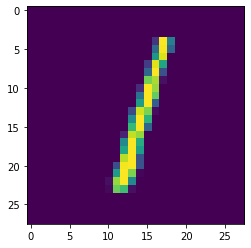

This is not an adversarial example


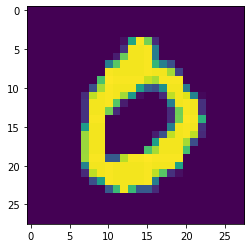

This is not an adversarial example


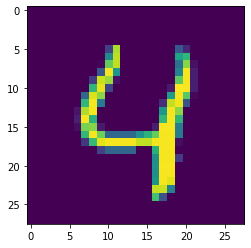

This is not an adversarial example


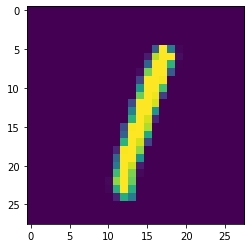

This is not an adversarial example


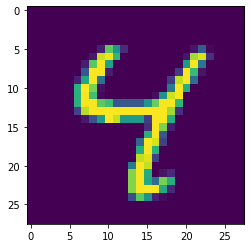

This is not an adversarial example


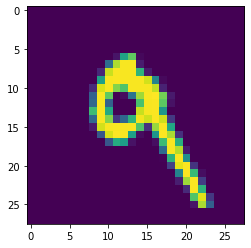

This is not an adversarial example


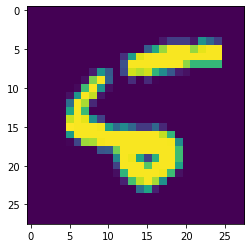

This is not an adversarial example


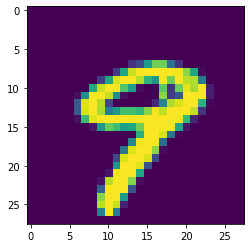

This is not an adversarial example


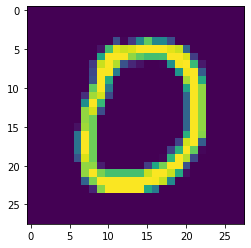

This is not an adversarial example


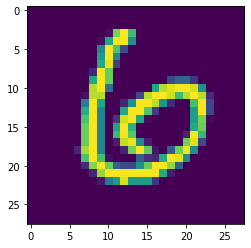

This is not an adversarial example


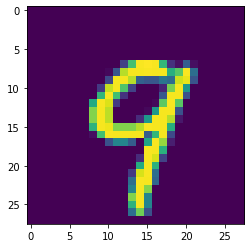

This is not an adversarial example


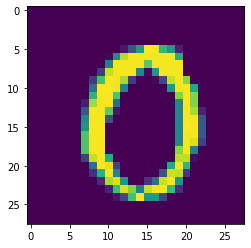

This is not an adversarial example


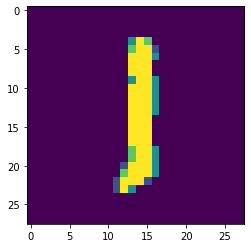

This is not an adversarial example


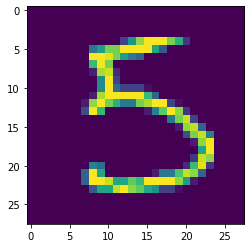

This is not an adversarial example


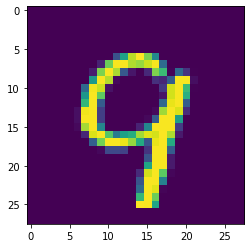

This is not an adversarial example


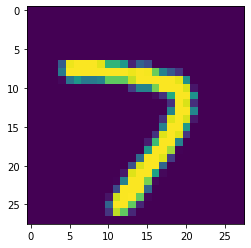

This is not an adversarial example


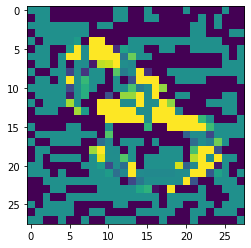

Prediction by model 1 is  3  and Prediction by model 2 is  8  Thus this is an adverserial example


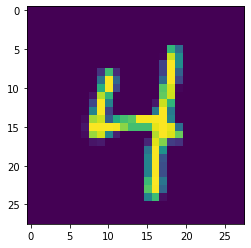

This is not an adversarial example


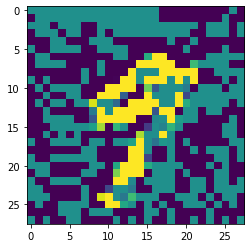

Prediction by model 1 is  1.0  and Prediction by model 2 is  0.44567665  Since the difference b/w prediction is greater than threshold this is an adverserial example


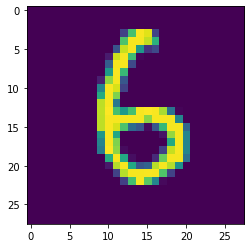

This is not an adversarial example


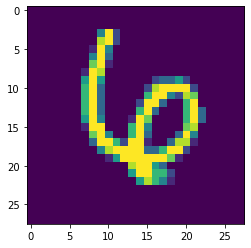

This is not an adversarial example


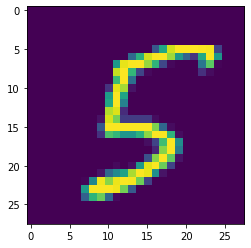

This is not an adversarial example


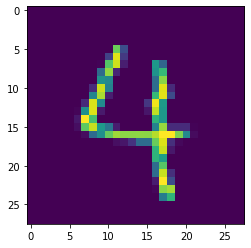

This is not an adversarial example


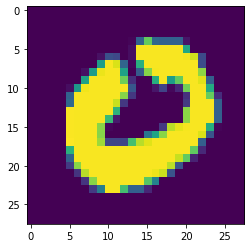

This is not an adversarial example


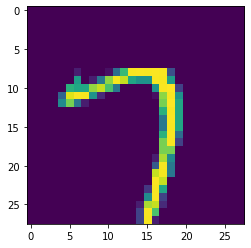

This is not an adversarial example


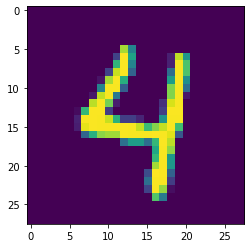

This is not an adversarial example


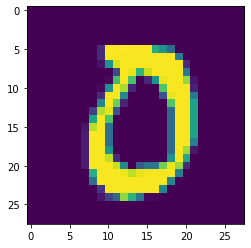

This is not an adversarial example


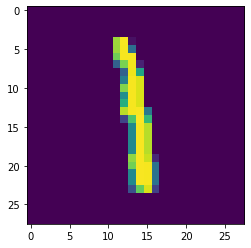

This is not an adversarial example


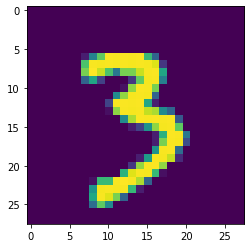

This is not an adversarial example


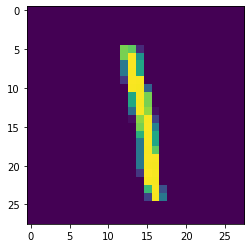

This is not an adversarial example


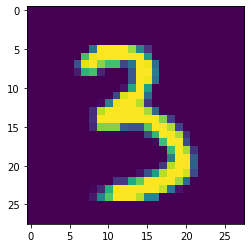

This is not an adversarial example


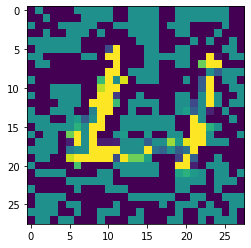

Prediction by model 1 is  0.9985526  and Prediction by model 2 is  0.59018356  Since the difference b/w prediction is greater than threshold this is an adverserial example


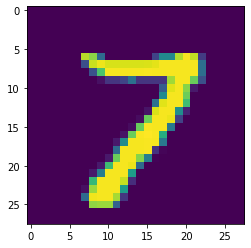

This is not an adversarial example


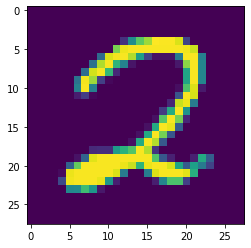

This is not an adversarial example


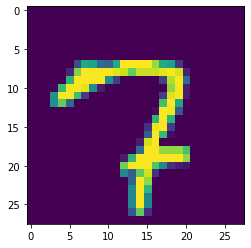

This is not an adversarial example


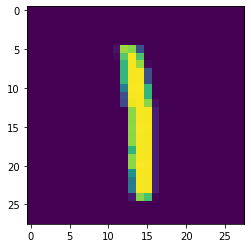

This is not an adversarial example


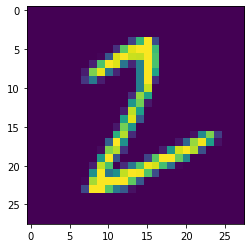

This is not an adversarial example


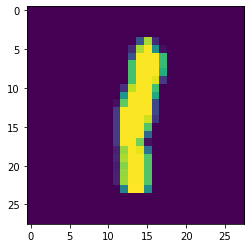

This is not an adversarial example


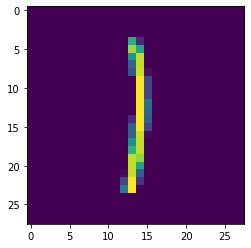

This is not an adversarial example


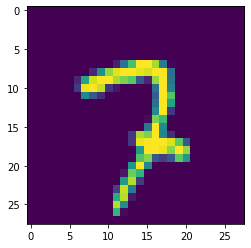

This is not an adversarial example


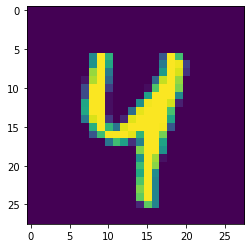

This is not an adversarial example


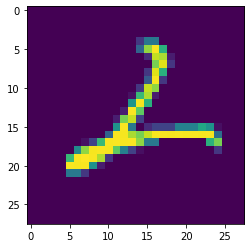

This is not an adversarial example


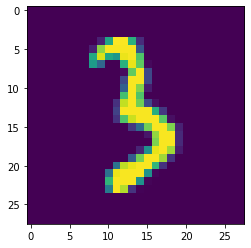

This is not an adversarial example


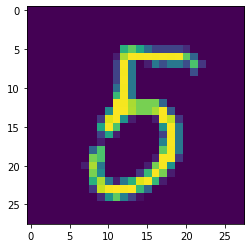

This is not an adversarial example


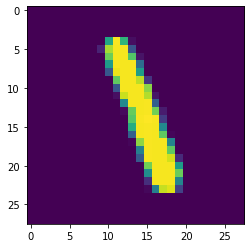

This is not an adversarial example


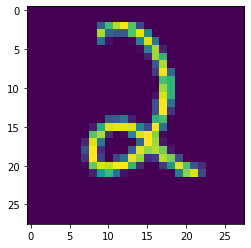

This is not an adversarial example


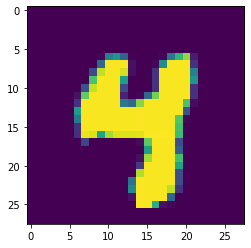

This is not an adversarial example


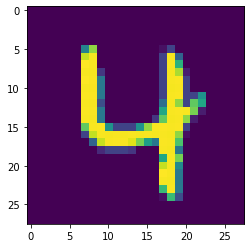

This is not an adversarial example


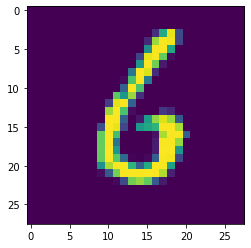

This is not an adversarial example


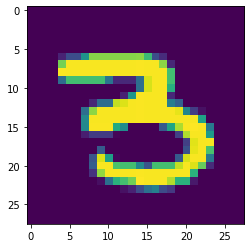

This is not an adversarial example


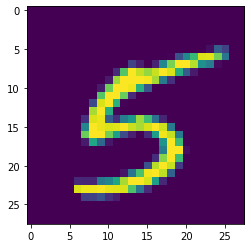

This is not an adversarial example


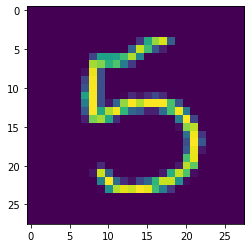

This is not an adversarial example


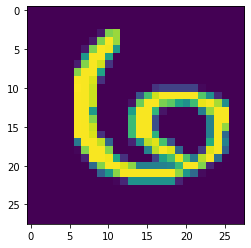

This is not an adversarial example


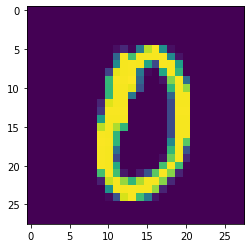

This is not an adversarial example


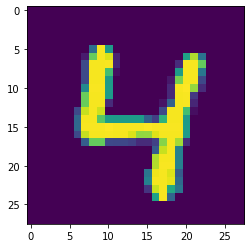

This is not an adversarial example


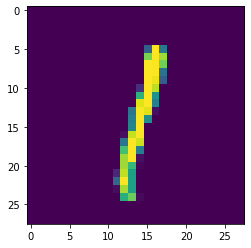

This is not an adversarial example


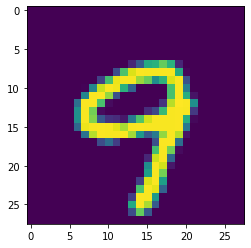

This is not an adversarial example


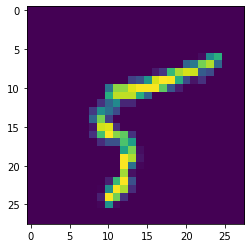

This is not an adversarial example


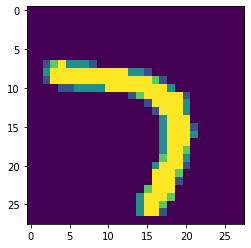

This is not an adversarial example


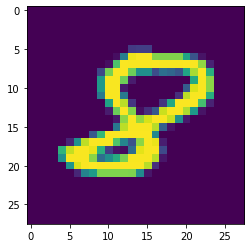

This is not an adversarial example


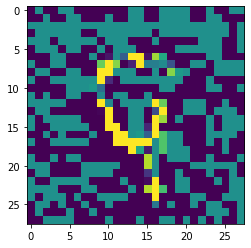

Prediction by model 1 is  9  and Prediction by model 2 is  8  Thus this is an adverserial example


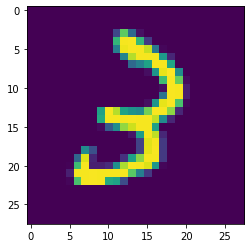

This is not an adversarial example


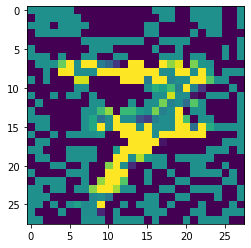

Prediction by model 1 is  0.9970975  and Prediction by model 2 is  0.24635857  Since the difference b/w prediction is greater than threshold this is an adverserial example


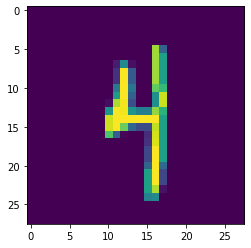

This is not an adversarial example


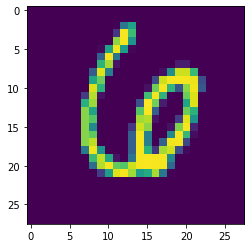

This is not an adversarial example


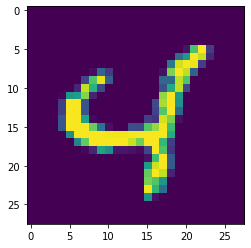

This is not an adversarial example


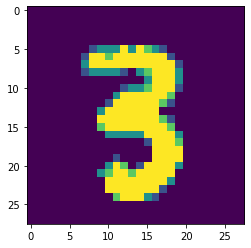

This is not an adversarial example


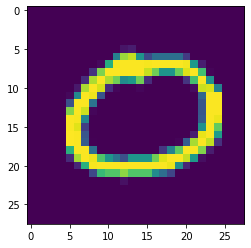

This is not an adversarial example


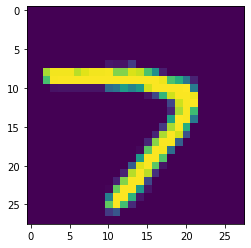

This is not an adversarial example


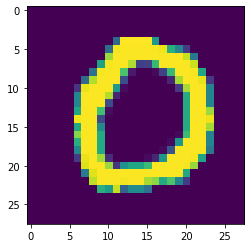

This is not an adversarial example


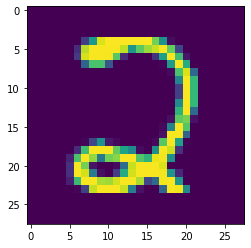

This is not an adversarial example


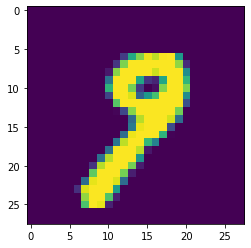

This is not an adversarial example


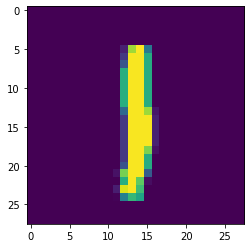

This is not an adversarial example


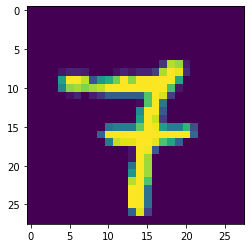

This is not an adversarial example


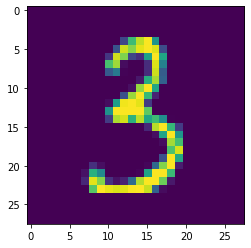

This is not an adversarial example


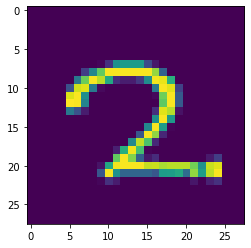

This is not an adversarial example


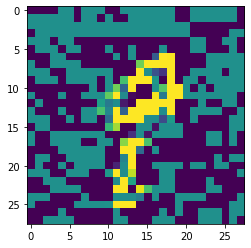

Prediction by model 1 is  9  and Prediction by model 2 is  0  Thus this is an adverserial example


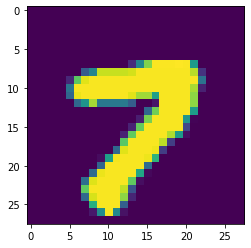

This is not an adversarial example


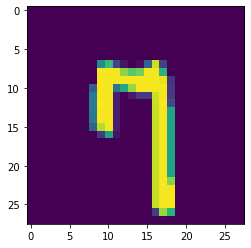

This is not an adversarial example


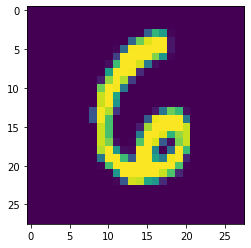

This is not an adversarial example


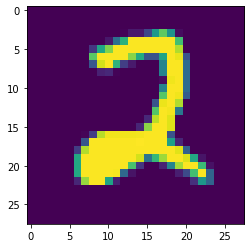

This is not an adversarial example


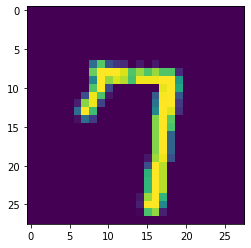

This is not an adversarial example


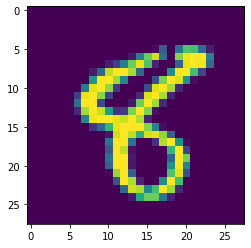

This is not an adversarial example


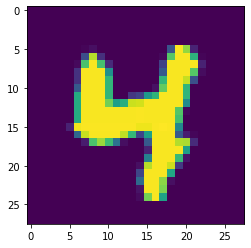

This is not an adversarial example


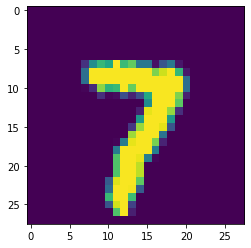

This is not an adversarial example


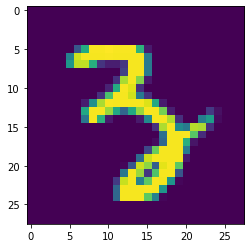

This is not an adversarial example


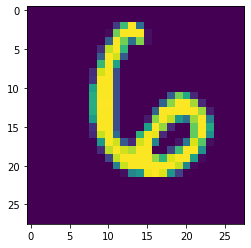

This is not an adversarial example


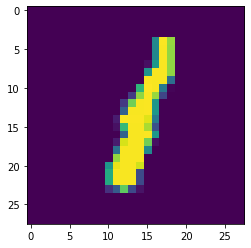

This is not an adversarial example


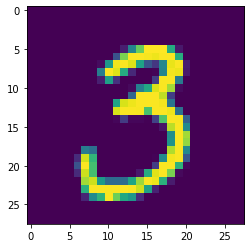

This is not an adversarial example


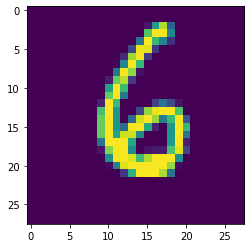

This is not an adversarial example


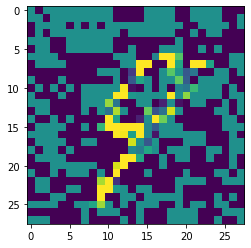

Prediction by model 1 is  0.99328774  and Prediction by model 2 is  0.48605448  Since the difference b/w prediction is greater than threshold this is an adverserial example


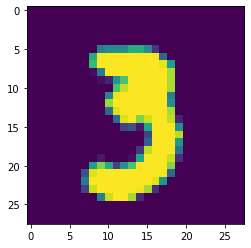

This is not an adversarial example


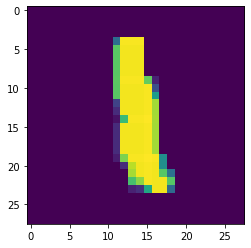

This is not an adversarial example


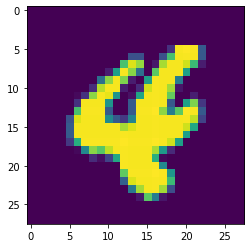

This is not an adversarial example


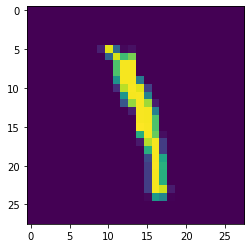

This is not an adversarial example


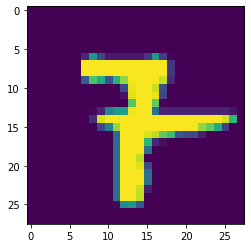

This is not an adversarial example


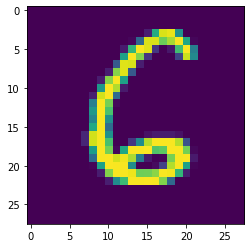

This is not an adversarial example


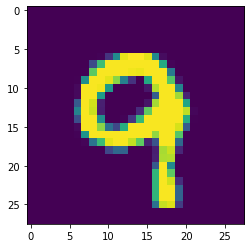

This is not an adversarial example


In [ ]:
count=0
t=[]
#plt.figure()
for i in range(100):
  a1=model1.predict(adv_test_set_1_mnist[i].reshape(1,28,28,1))
  a2=model2.predict(adv_test_set_1_mnist[i].reshape(1,28,28,1))
  n1=np.argmax(a1)
  n2=np.argmax(a2)
  if n1!=n2:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_mnist[i]))
    plt.show()
    print("Prediction by model 1 is ",n1," and Prediction by model 2 is ",n2," Thus this is an adverserial example")
    
  elif abs(a1[0][n1]-a2[0][n2])>0.05:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_mnist[i]))
    plt.show()
    print("Prediction by model 1 is ",a1[0][n1]," and Prediction by model 2 is ",a2[0][n2]," Since the difference b/w prediction is greater than threshold this is an adverserial example")

  else:
    plt.imshow(np.squeeze(x_test[i]))
    plt.show()
    print("This is not an adversarial example")

In [ ]:
print("The number of adverserial examples in adverserial test set 1 is", count)

The number of adverserial examples in adverserial test set 1 is 7


**Adverserial examples from adverserial test set 2 Mnist**



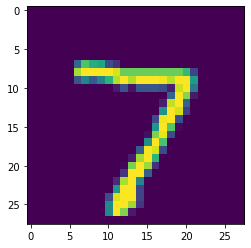

This is not an adversarial example


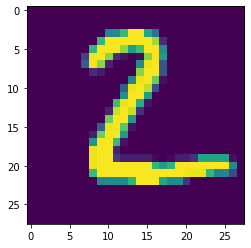

This is not an adversarial example


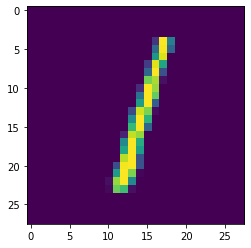

This is not an adversarial example


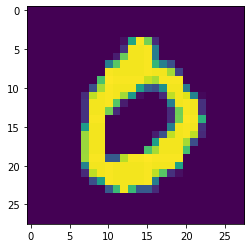

This is not an adversarial example


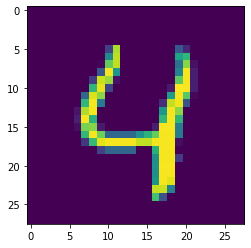

This is not an adversarial example


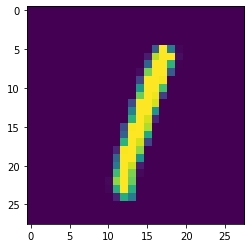

This is not an adversarial example


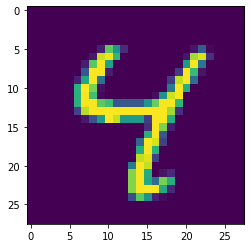

This is not an adversarial example


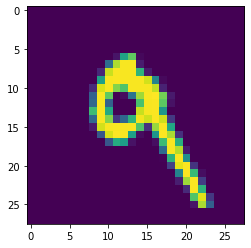

This is not an adversarial example


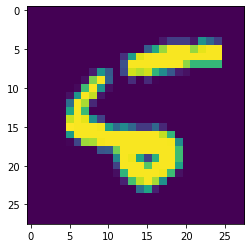

This is not an adversarial example


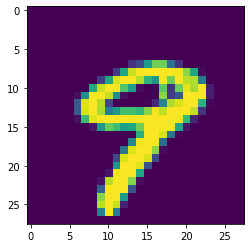

This is not an adversarial example


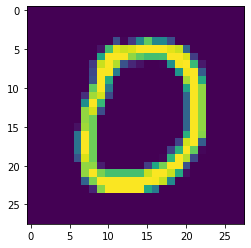

This is not an adversarial example


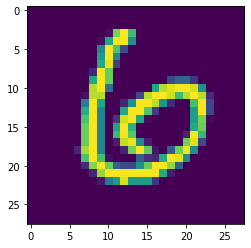

This is not an adversarial example


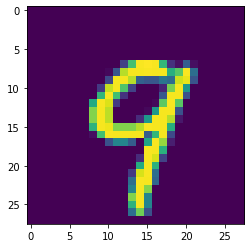

This is not an adversarial example


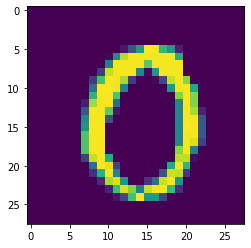

This is not an adversarial example


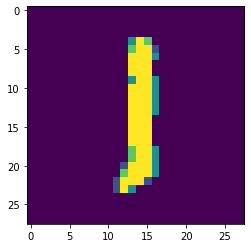

This is not an adversarial example


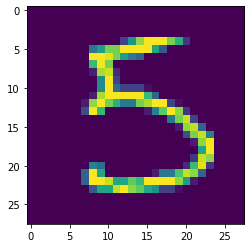

This is not an adversarial example


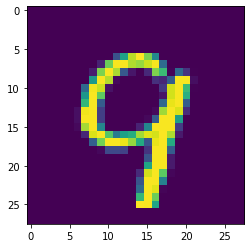

This is not an adversarial example


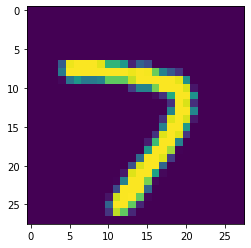

This is not an adversarial example


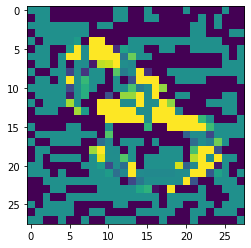

Prediction by model 1 is  3  and Prediction by model 2 is  8  Thus this is an adverserial example


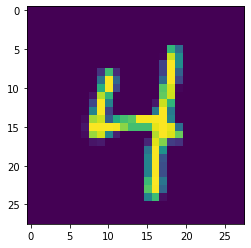

This is not an adversarial example


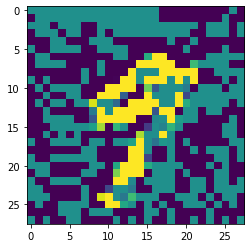

Prediction by model 1 is  1.0  and Prediction by model 2 is  0.44567665  Since the difference b/w prediction is greater than threshold this is an adverserial example


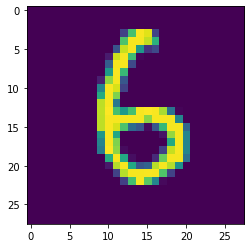

This is not an adversarial example


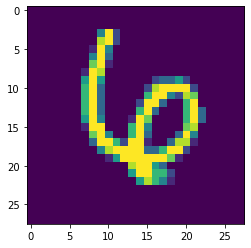

This is not an adversarial example


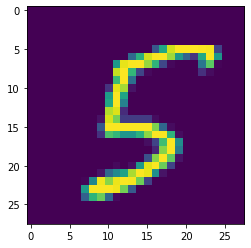

This is not an adversarial example


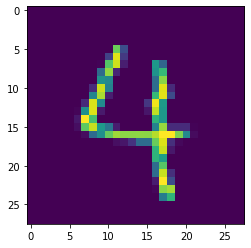

This is not an adversarial example


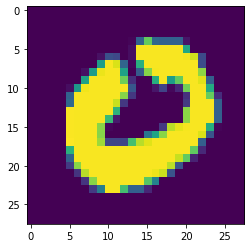

This is not an adversarial example


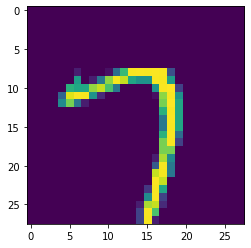

This is not an adversarial example


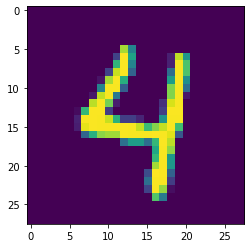

This is not an adversarial example


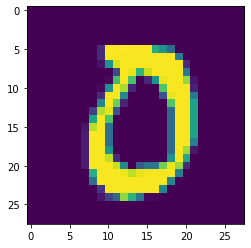

This is not an adversarial example


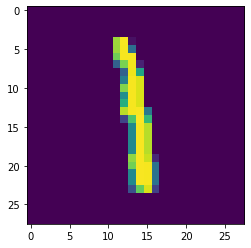

This is not an adversarial example


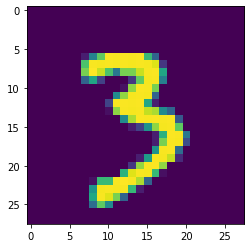

This is not an adversarial example


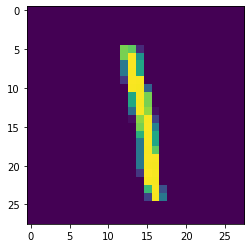

This is not an adversarial example


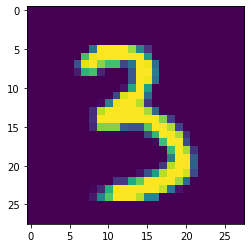

This is not an adversarial example


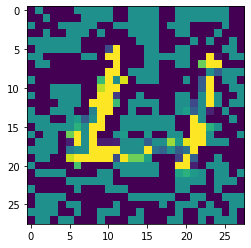

Prediction by model 1 is  0.9985526  and Prediction by model 2 is  0.59018356  Since the difference b/w prediction is greater than threshold this is an adverserial example


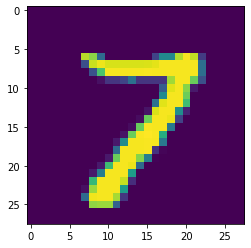

This is not an adversarial example


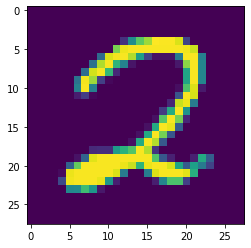

This is not an adversarial example


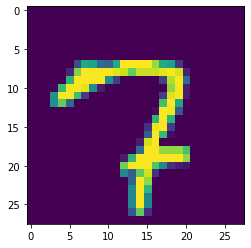

This is not an adversarial example


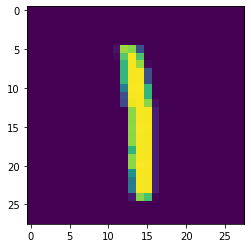

This is not an adversarial example


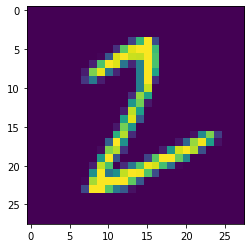

This is not an adversarial example


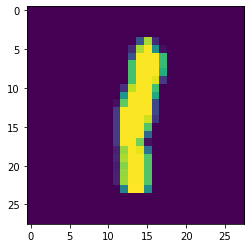

This is not an adversarial example


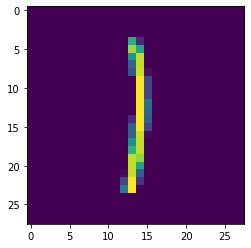

This is not an adversarial example


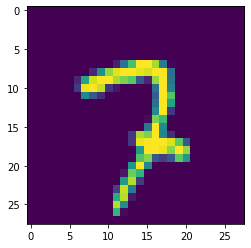

This is not an adversarial example


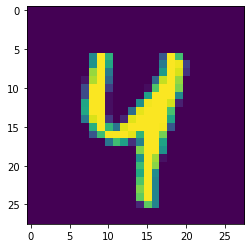

This is not an adversarial example


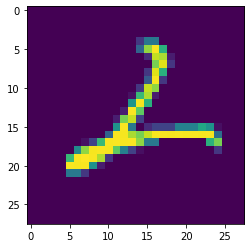

This is not an adversarial example


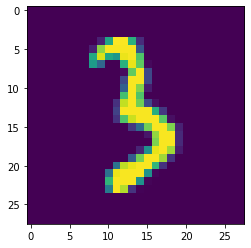

This is not an adversarial example


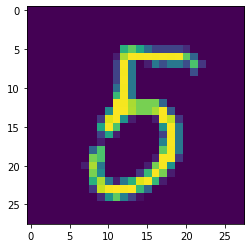

This is not an adversarial example


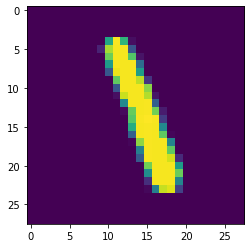

This is not an adversarial example


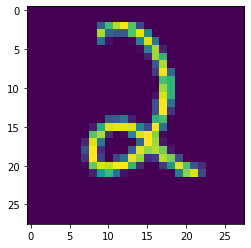

This is not an adversarial example


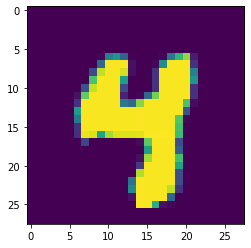

This is not an adversarial example


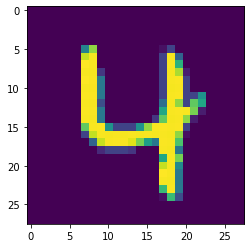

This is not an adversarial example


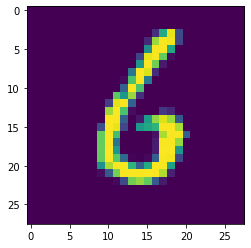

This is not an adversarial example


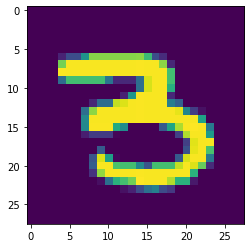

This is not an adversarial example


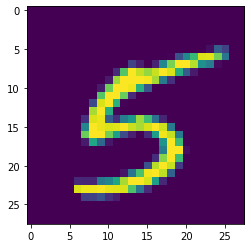

This is not an adversarial example


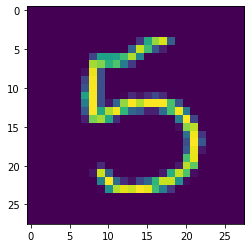

This is not an adversarial example


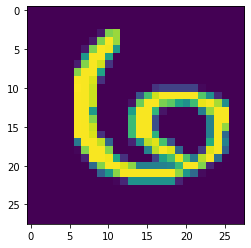

This is not an adversarial example


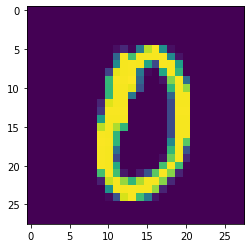

This is not an adversarial example


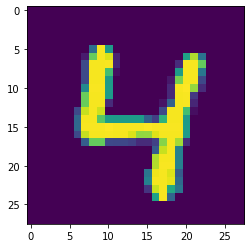

This is not an adversarial example


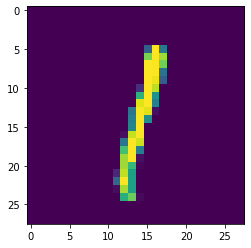

This is not an adversarial example


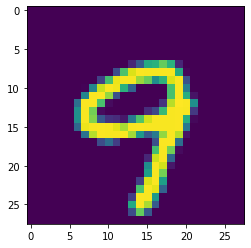

This is not an adversarial example


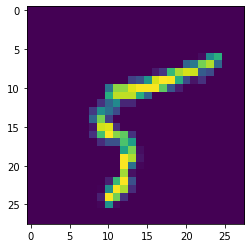

This is not an adversarial example


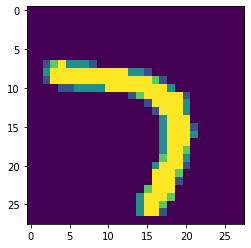

This is not an adversarial example


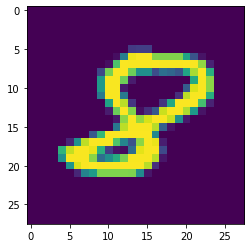

This is not an adversarial example


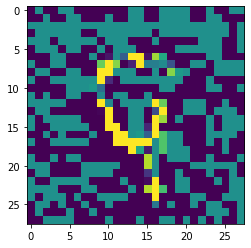

Prediction by model 1 is  9  and Prediction by model 2 is  8  Thus this is an adverserial example


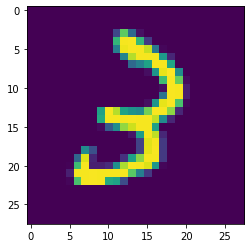

This is not an adversarial example


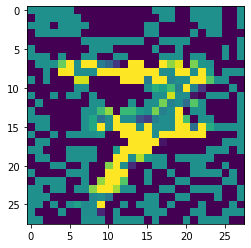

Prediction by model 1 is  0.9970975  and Prediction by model 2 is  0.24635857  Since the difference b/w prediction is greater than threshold this is an adverserial example


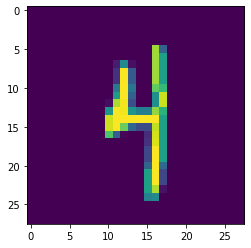

This is not an adversarial example


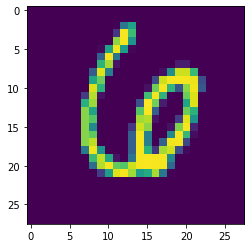

This is not an adversarial example


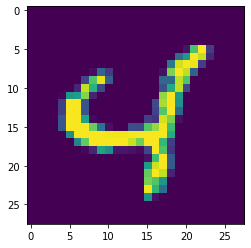

This is not an adversarial example


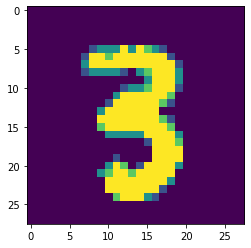

This is not an adversarial example


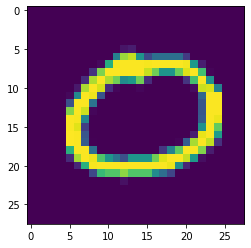

This is not an adversarial example


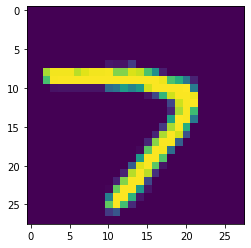

This is not an adversarial example


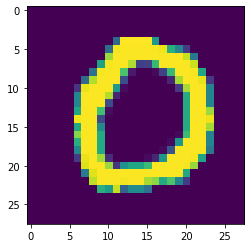

This is not an adversarial example


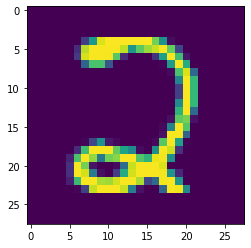

This is not an adversarial example


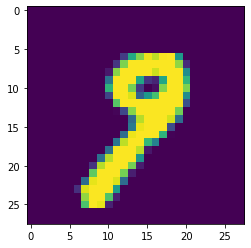

This is not an adversarial example


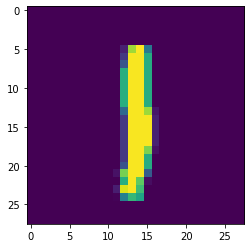

This is not an adversarial example


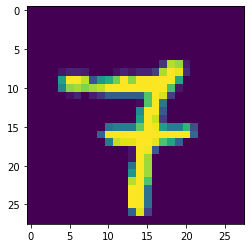

This is not an adversarial example


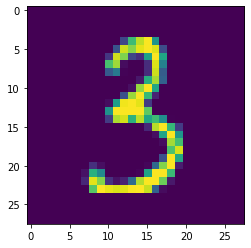

This is not an adversarial example


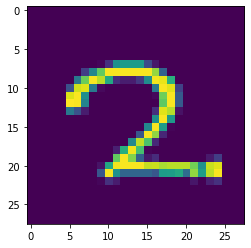

This is not an adversarial example


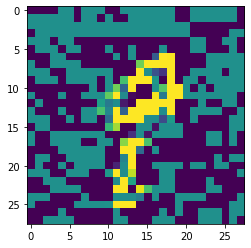

Prediction by model 1 is  9  and Prediction by model 2 is  0  Thus this is an adverserial example


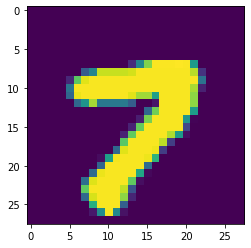

This is not an adversarial example


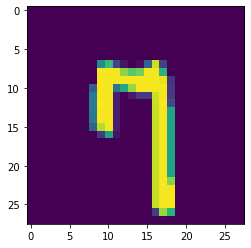

This is not an adversarial example


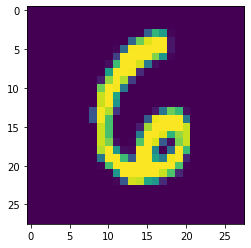

This is not an adversarial example


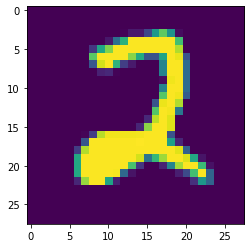

This is not an adversarial example


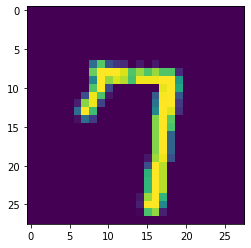

This is not an adversarial example


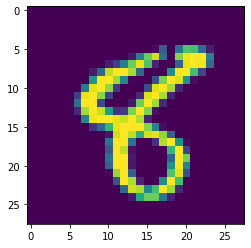

This is not an adversarial example


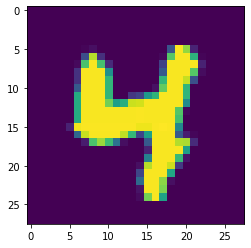

This is not an adversarial example


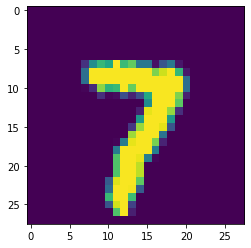

This is not an adversarial example


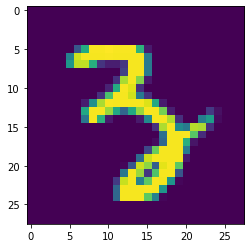

This is not an adversarial example


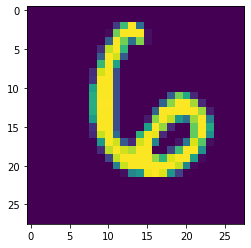

This is not an adversarial example


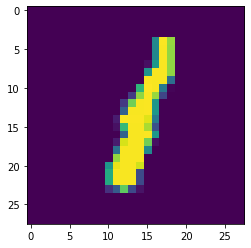

This is not an adversarial example


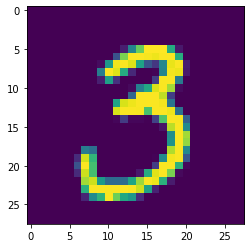

This is not an adversarial example


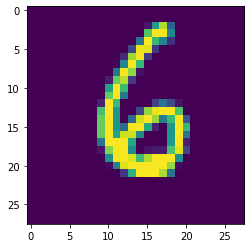

This is not an adversarial example


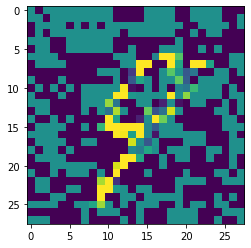

Prediction by model 1 is  0.99328774  and Prediction by model 2 is  0.48605448  Since the difference b/w prediction is greater than threshold this is an adverserial example


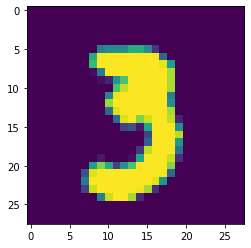

This is not an adversarial example


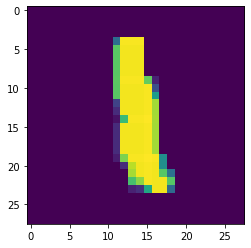

This is not an adversarial example


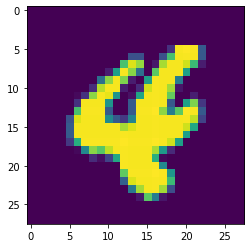

This is not an adversarial example


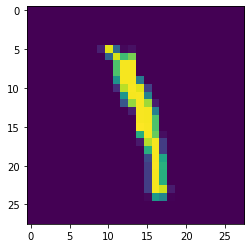

This is not an adversarial example


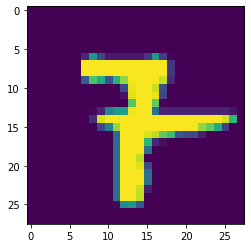

This is not an adversarial example


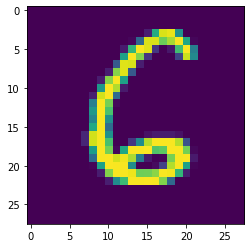

This is not an adversarial example


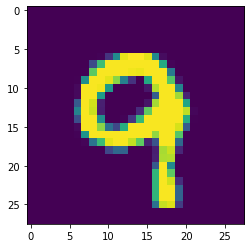

This is not an adversarial example


In [ ]:
count=0
for i in range(100):
  a1=model1.predict(adv_test_set_2_mnist[i].reshape(1,28,28,1))
  a2=model2.predict(adv_test_set_2_mnist[i].reshape(1,28,28,1))
  n1=np.argmax(a1)
  n2=np.argmax(a2)
  if n1!=n2:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_2_mnist[i]))
    plt.show()
    print("Prediction by model 1 is ",n1," and Prediction by model 2 is ",n2," Thus this is an adverserial example")
    
  elif abs(a1[0][n1]-a2[0][n2])>0.05:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_2_mnist[i]))
    plt.show()
    print("Prediction by model 1 is ",a1[0][n1]," and Prediction by model 2 is ",a2[0][n2]," Since the difference b/w prediction is greater than threshold this is an adverserial example")
  else:
    plt.imshow(np.squeeze(x_test[i]))
    plt.show()
    print("This is not an adversarial example")

In [ ]:
print("The number of adverserial examples in adverserial test set 2 is", count)

The number of adverserial examples in adverserial test set 2 is 7


**Adverserial examples from orignal test set Cifar**


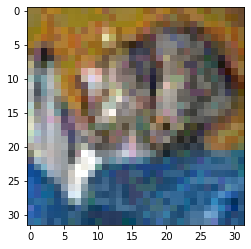

Prediction by model 1 is  0.9846608  and Prediction by model 2 is  0.33288136  Since the difference b/w prediction is greater than threshold this is an adverserial example


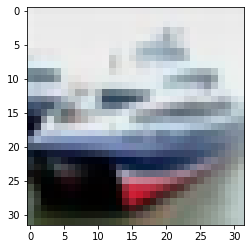

This is not an adversarial example


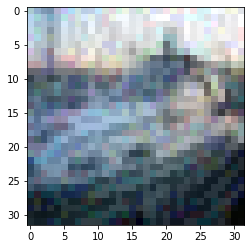

Prediction by model 1 is  8  and Prediction by model 2 is  1  Thus this is an adverserial example


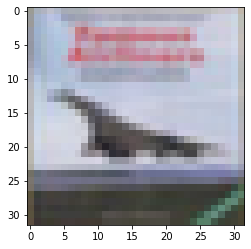

Prediction by model 1 is  0.99976856  and Prediction by model 2 is  0.21621919  Since the difference b/w prediction is greater than threshold this is an adverserial example


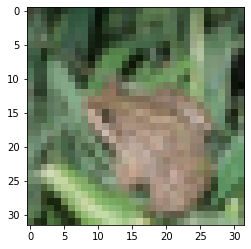

This is not an adversarial example


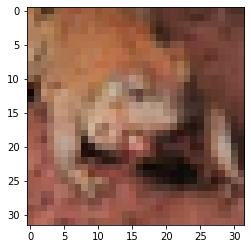

This is not an adversarial example


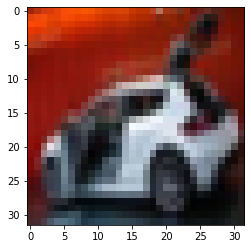

This is not an adversarial example


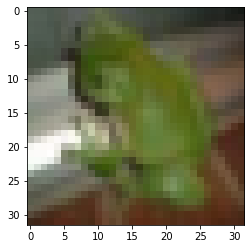

This is not an adversarial example


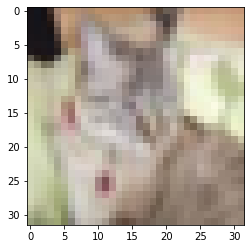

This is not an adversarial example


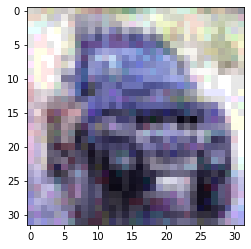

Prediction by model 1 is  1  and Prediction by model 2 is  3  Thus this is an adverserial example


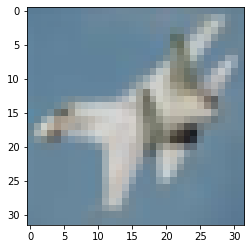

This is not an adversarial example


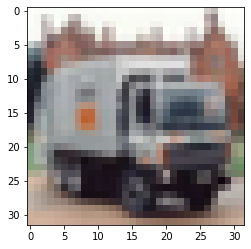

This is not an adversarial example


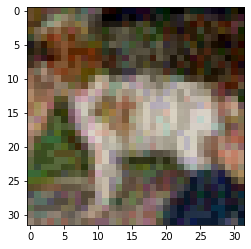

Prediction by model 1 is  5  and Prediction by model 2 is  3  Thus this is an adverserial example


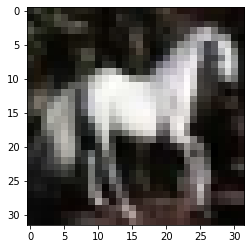

This is not an adversarial example


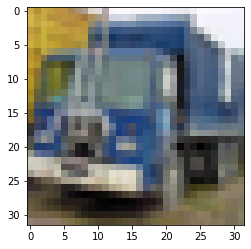

This is not an adversarial example


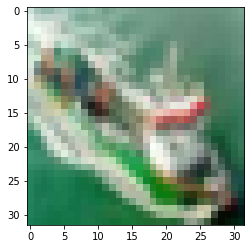

This is not an adversarial example


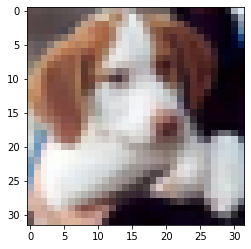

This is not an adversarial example


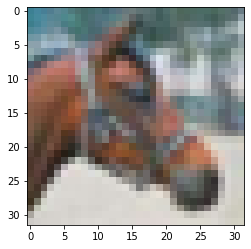

This is not an adversarial example


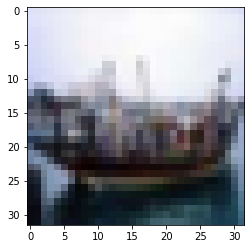

This is not an adversarial example


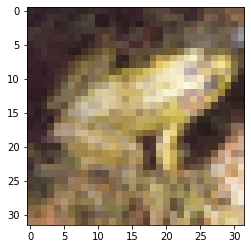

This is not an adversarial example


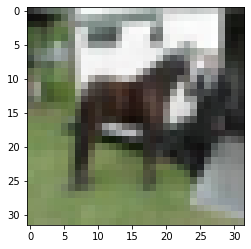

This is not an adversarial example


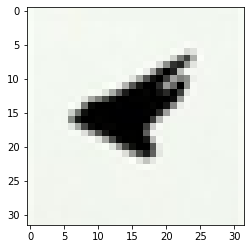

This is not an adversarial example


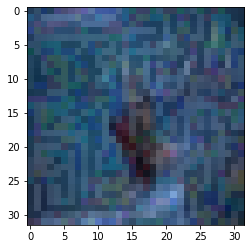

Prediction by model 1 is  2  and Prediction by model 2 is  4  Thus this is an adverserial example


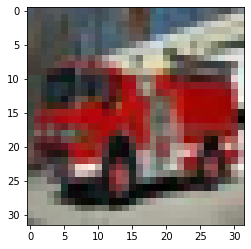

This is not an adversarial example


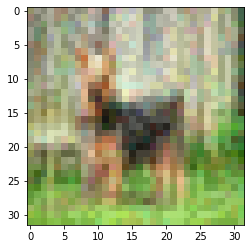

Prediction by model 1 is  4  and Prediction by model 2 is  2  Thus this is an adverserial example


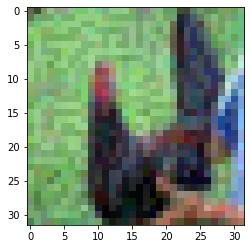

Prediction by model 1 is  3  and Prediction by model 2 is  2  Thus this is an adverserial example


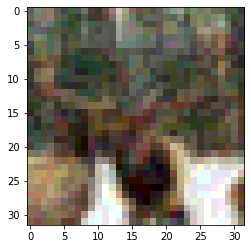

Prediction by model 1 is  4  and Prediction by model 2 is  5  Thus this is an adverserial example


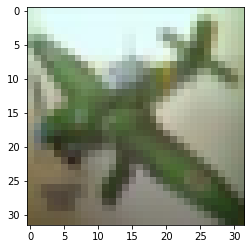

This is not an adversarial example


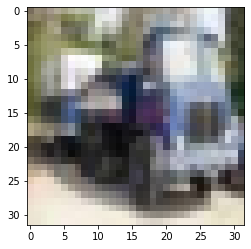

This is not an adversarial example


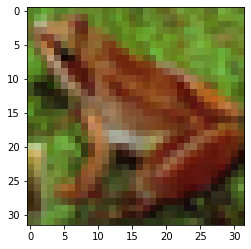

This is not an adversarial example


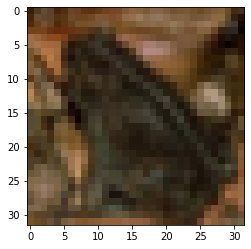

This is not an adversarial example


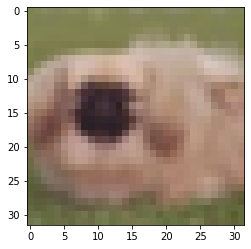

This is not an adversarial example


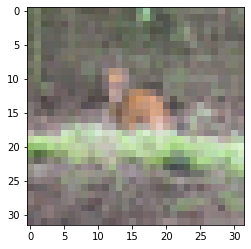

This is not an adversarial example


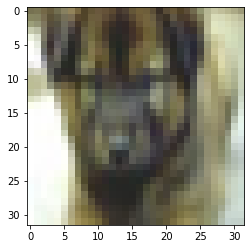

This is not an adversarial example


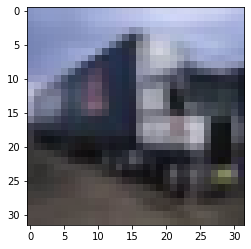

This is not an adversarial example


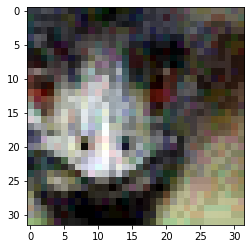

Prediction by model 1 is  8  and Prediction by model 2 is  1  Thus this is an adverserial example


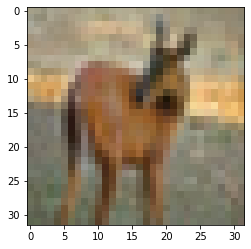

This is not an adversarial example


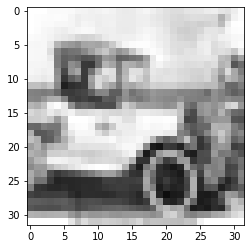

This is not an adversarial example


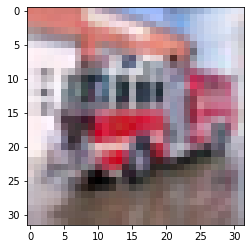

This is not an adversarial example


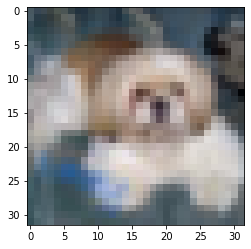

This is not an adversarial example


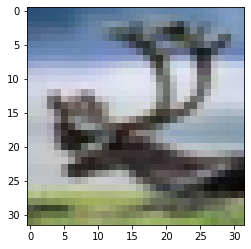

This is not an adversarial example


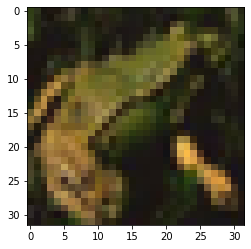

This is not an adversarial example


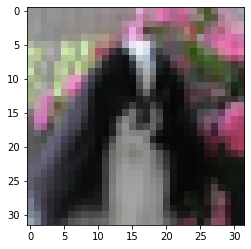

This is not an adversarial example


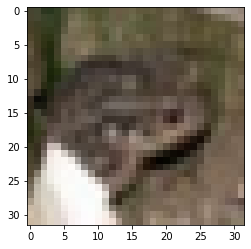

This is not an adversarial example


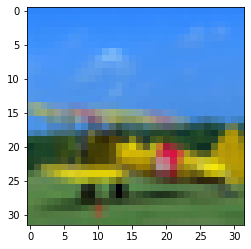

This is not an adversarial example


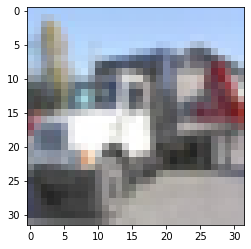

This is not an adversarial example


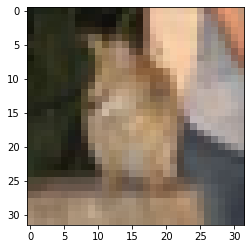

This is not an adversarial example


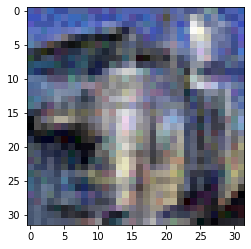

Prediction by model 1 is  9  and Prediction by model 2 is  7  Thus this is an adverserial example


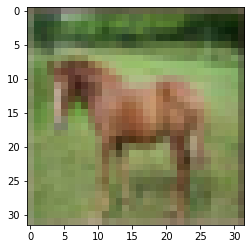

Prediction by model 1 is  7  and Prediction by model 2 is  4  Thus this is an adverserial example


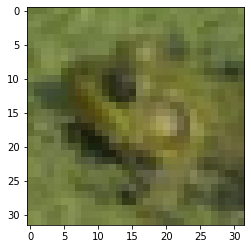

This is not an adversarial example


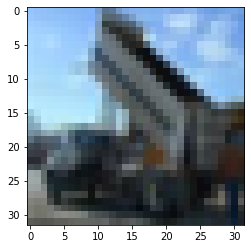

This is not an adversarial example


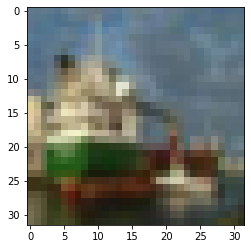

This is not an adversarial example


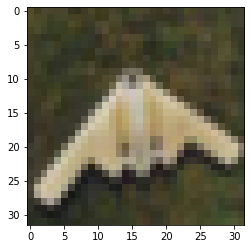

Prediction by model 1 is  7  and Prediction by model 2 is  2  Thus this is an adverserial example


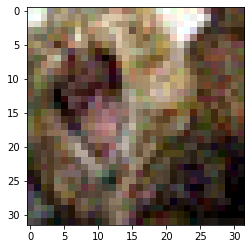

Prediction by model 1 is  3  and Prediction by model 2 is  5  Thus this is an adverserial example


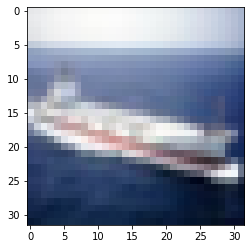

This is not an adversarial example


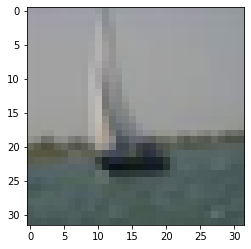

This is not an adversarial example


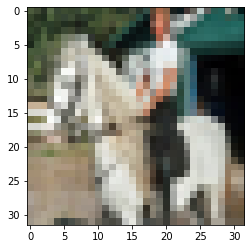

This is not an adversarial example


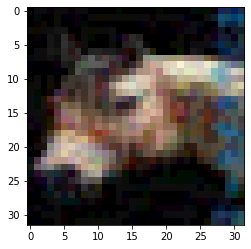

Prediction by model 1 is  3  and Prediction by model 2 is  5  Thus this is an adverserial example


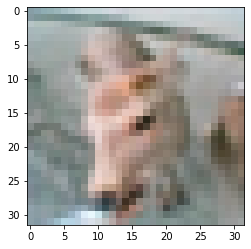

This is not an adversarial example


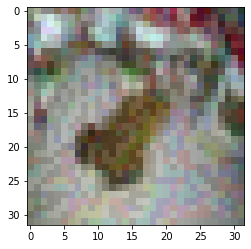

Prediction by model 1 is  3  and Prediction by model 2 is  5  Thus this is an adverserial example


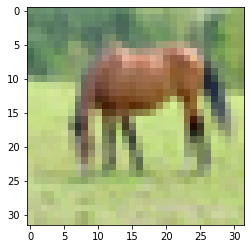

This is not an adversarial example


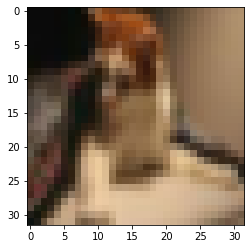

This is not an adversarial example


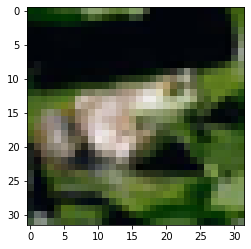

This is not an adversarial example


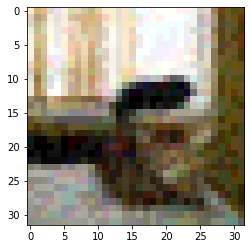

Prediction by model 1 is  2  and Prediction by model 2 is  3  Thus this is an adverserial example


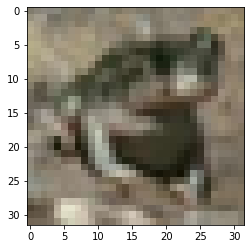

This is not an adversarial example


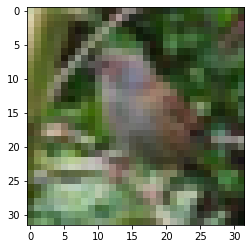

This is not an adversarial example


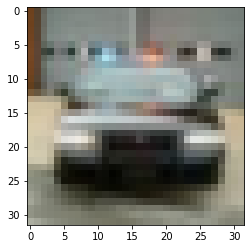

This is not an adversarial example


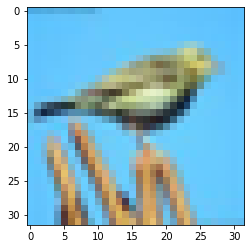

This is not an adversarial example


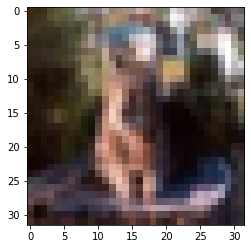

This is not an adversarial example


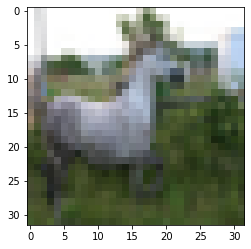

This is not an adversarial example


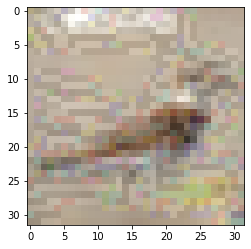

Prediction by model 1 is  2  and Prediction by model 2 is  3  Thus this is an adverserial example


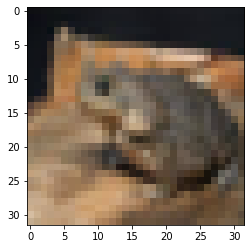

This is not an adversarial example


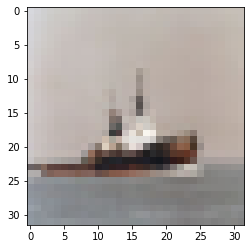

This is not an adversarial example


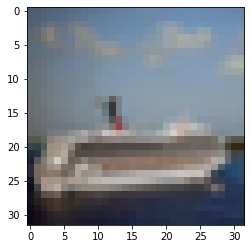

This is not an adversarial example


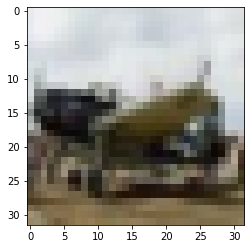

Prediction by model 1 is  0.9417686  and Prediction by model 2 is  0.2004996  Since the difference b/w prediction is greater than threshold this is an adverserial example


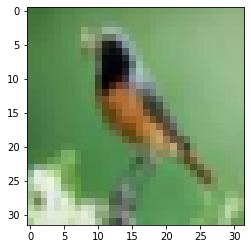

This is not an adversarial example


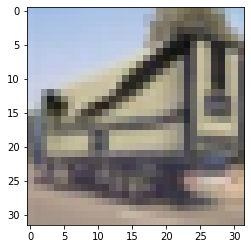

This is not an adversarial example


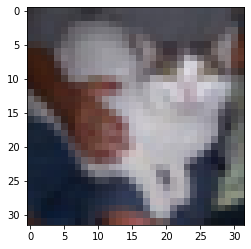

This is not an adversarial example


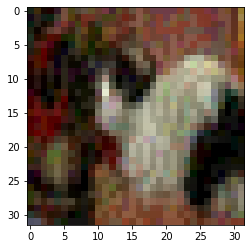

Prediction by model 1 is  3  and Prediction by model 2 is  5  Thus this is an adverserial example


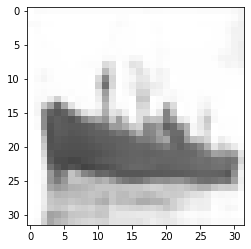

This is not an adversarial example


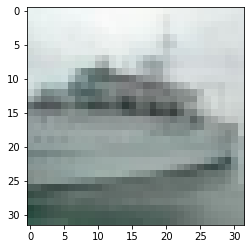

This is not an adversarial example


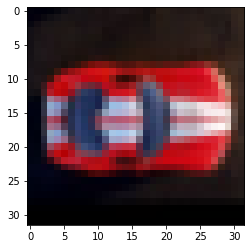

This is not an adversarial example


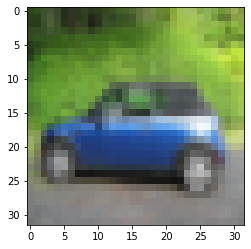

This is not an adversarial example


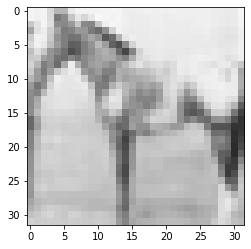

This is not an adversarial example


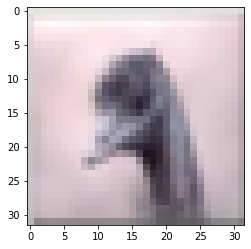

This is not an adversarial example


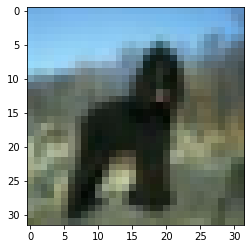

This is not an adversarial example


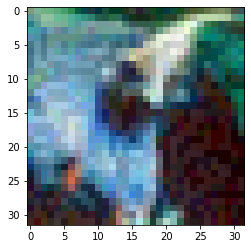

Prediction by model 1 is  2  and Prediction by model 2 is  4  Thus this is an adverserial example


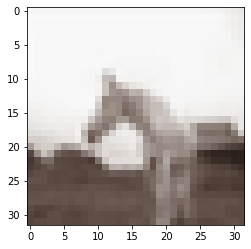

This is not an adversarial example


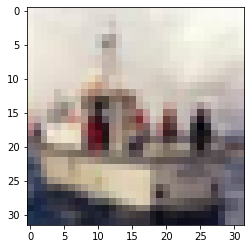

This is not an adversarial example


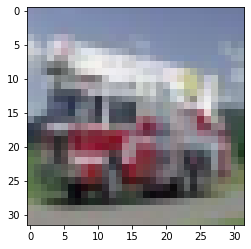

This is not an adversarial example


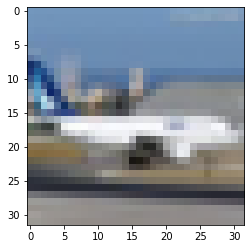

This is not an adversarial example


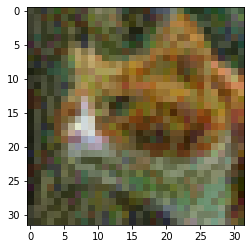

Prediction by model 1 is  6  and Prediction by model 2 is  2  Thus this is an adverserial example


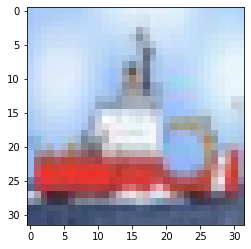

This is not an adversarial example


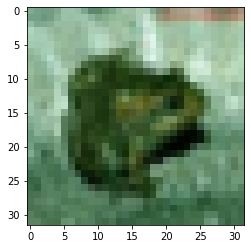

This is not an adversarial example


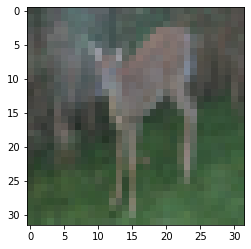

This is not an adversarial example


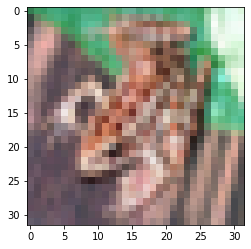

This is not an adversarial example


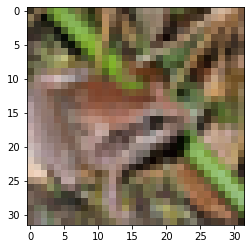

This is not an adversarial example


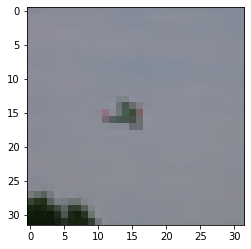

This is not an adversarial example


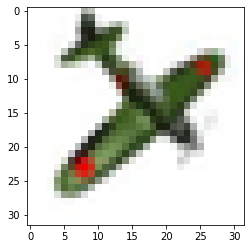

This is not an adversarial example


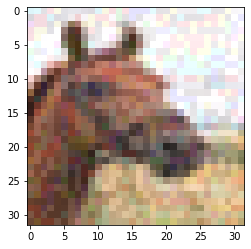

Prediction by model 1 is  4  and Prediction by model 2 is  7  Thus this is an adverserial example


In [ ]:
count=0
for i in range(100):
  a1=model3.predict(x_test1[i].reshape(1,32,32,3))
  a2=model4.predict(x_test1[i].reshape(1,32,32,3))
  n1=np.argmax(a1)
  n2=np.argmax(a2)
  if n1!=n2:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_cifar[i]))
    plt.show()
    print("Prediction by model 1 is ",n1," and Prediction by model 2 is ",n2," Thus this is an adverserial example")
    
  elif abs(a1[0][n1]-a2[0][n2])>0.65:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_cifar[i]))
    plt.show()
    print("Prediction by model 1 is ",a1[0][n1]," and Prediction by model 2 is ",a2[0][n2]," Since the difference b/w prediction is greater than threshold this is an adverserial example")
  else:
    plt.imshow(np.squeeze(x_test1[i]))
    plt.show()
    print("This is not an adversarial example")

In [ ]:
print("The number of adverserial examples in original test set is", count)

The number of adverserial examples in original test set is 23


**Adverserial examples from adverserial test set 1 Cifar**

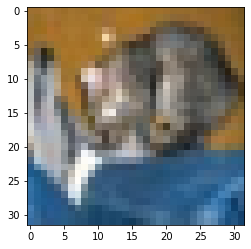

This is not an adversarial example


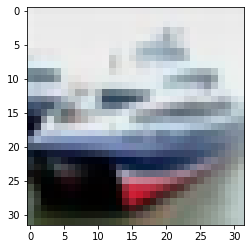

This is not an adversarial example


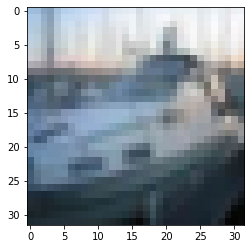

This is not an adversarial example


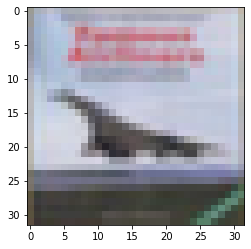

Prediction by model 1 is  0.99976856  and Prediction by model 2 is  0.21621919  Since the difference b/w prediction is greater than threshold this is an adverserial example


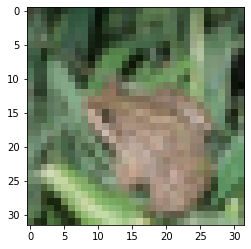

This is not an adversarial example


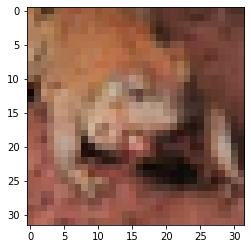

This is not an adversarial example


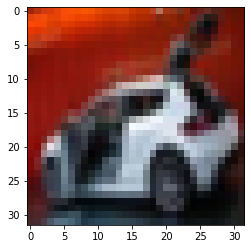

This is not an adversarial example


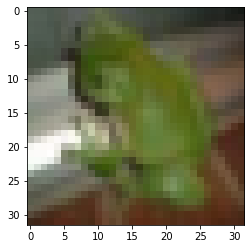

This is not an adversarial example


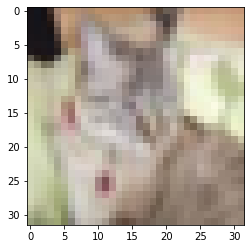

This is not an adversarial example


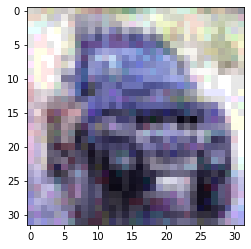

Prediction by model 1 is  1  and Prediction by model 2 is  3  Thus this is an adverserial example


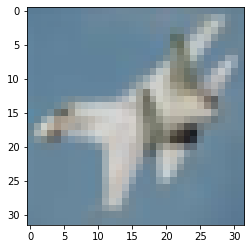

This is not an adversarial example


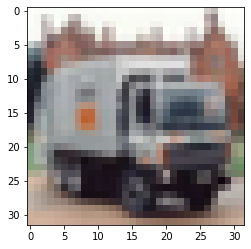

This is not an adversarial example


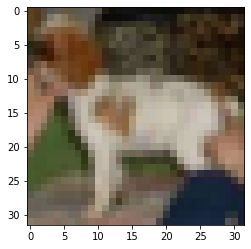

This is not an adversarial example


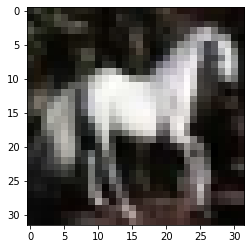

This is not an adversarial example


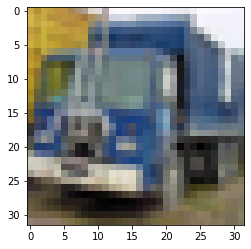

This is not an adversarial example


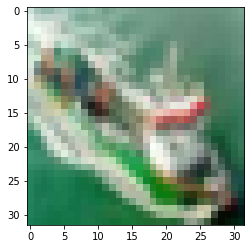

This is not an adversarial example


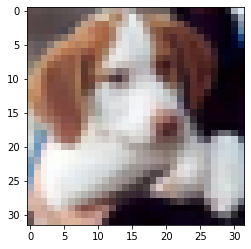

This is not an adversarial example


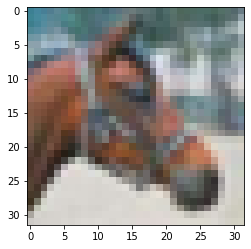

This is not an adversarial example


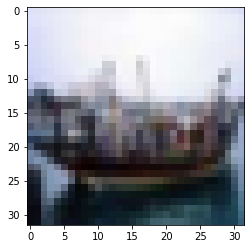

This is not an adversarial example


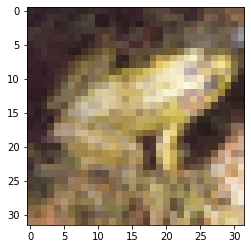

This is not an adversarial example


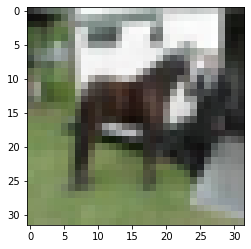

This is not an adversarial example


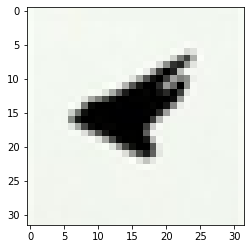

This is not an adversarial example


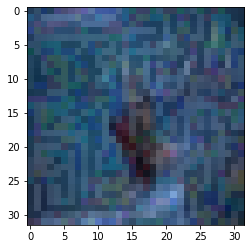

Prediction by model 1 is  4  and Prediction by model 2 is  2  Thus this is an adverserial example


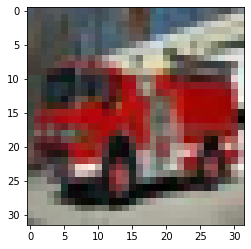

This is not an adversarial example


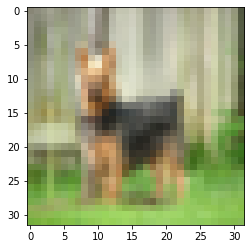

This is not an adversarial example


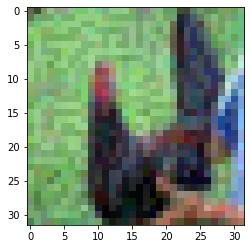

Prediction by model 1 is  9  and Prediction by model 2 is  2  Thus this is an adverserial example


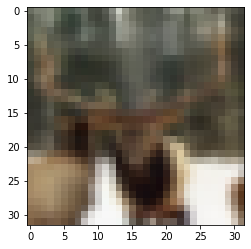

This is not an adversarial example


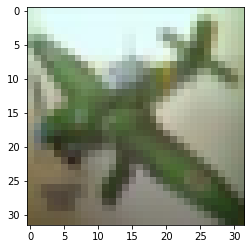

This is not an adversarial example


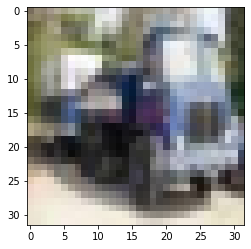

This is not an adversarial example


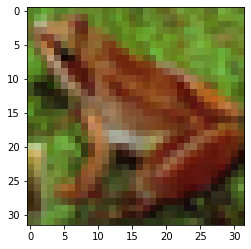

This is not an adversarial example


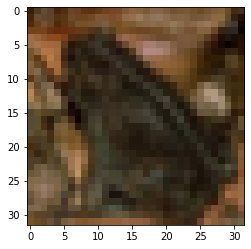

This is not an adversarial example


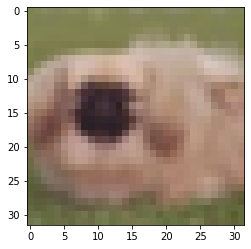

This is not an adversarial example


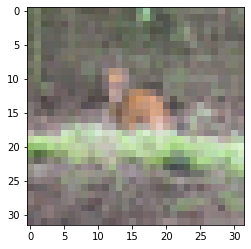

This is not an adversarial example


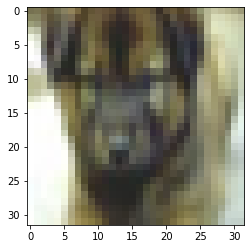

This is not an adversarial example


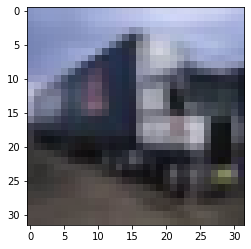

This is not an adversarial example


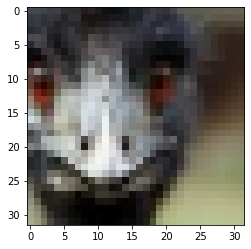

This is not an adversarial example


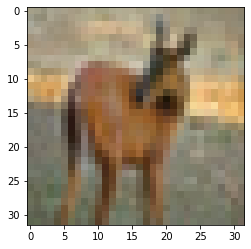

This is not an adversarial example


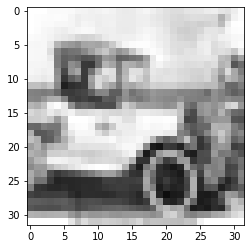

This is not an adversarial example


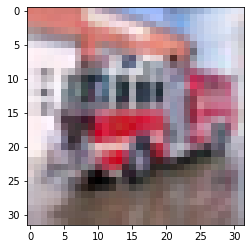

This is not an adversarial example


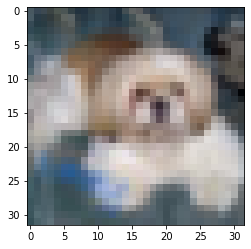

This is not an adversarial example


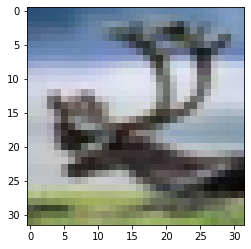

This is not an adversarial example


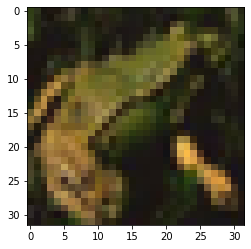

This is not an adversarial example


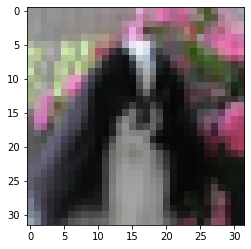

This is not an adversarial example


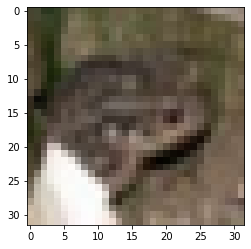

This is not an adversarial example


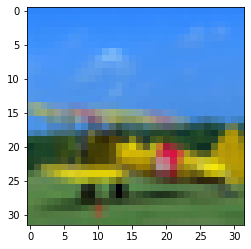

This is not an adversarial example


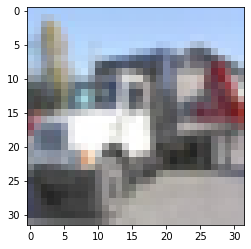

This is not an adversarial example


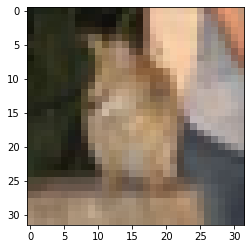

This is not an adversarial example


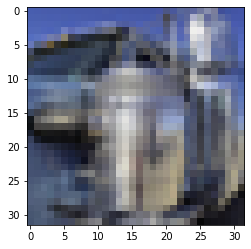

This is not an adversarial example


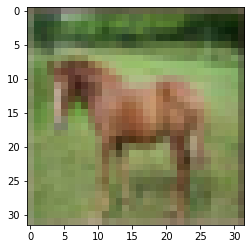

Prediction by model 1 is  7  and Prediction by model 2 is  4  Thus this is an adverserial example


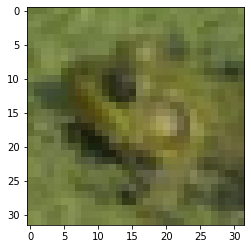

This is not an adversarial example


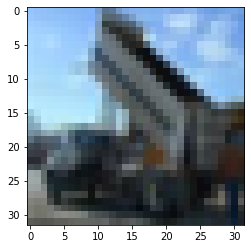

This is not an adversarial example


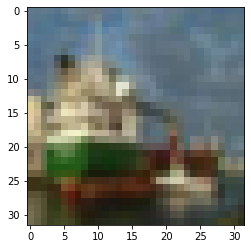

This is not an adversarial example


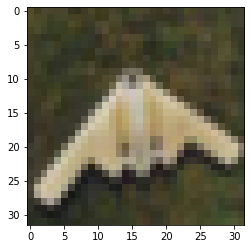

Prediction by model 1 is  7  and Prediction by model 2 is  2  Thus this is an adverserial example


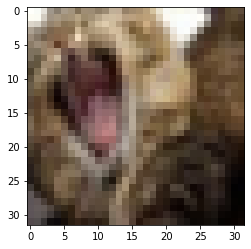

This is not an adversarial example


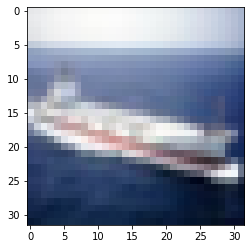

This is not an adversarial example


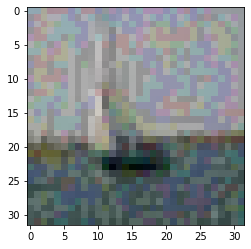

Prediction by model 1 is  0.99864167  and Prediction by model 2 is  0.32037255  Since the difference b/w prediction is greater than threshold this is an adverserial example


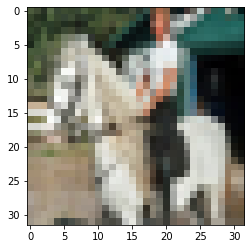

This is not an adversarial example


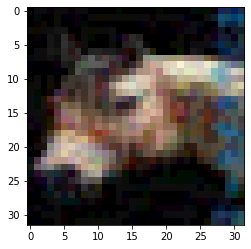

Prediction by model 1 is  7  and Prediction by model 2 is  5  Thus this is an adverserial example


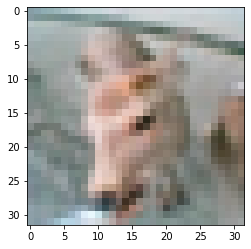

This is not an adversarial example


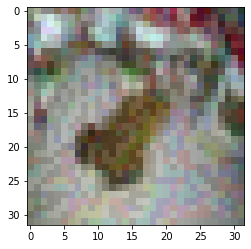

Prediction by model 1 is  6  and Prediction by model 2 is  3  Thus this is an adverserial example


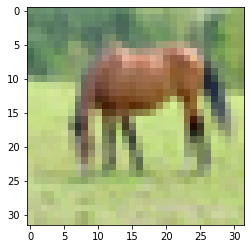

This is not an adversarial example


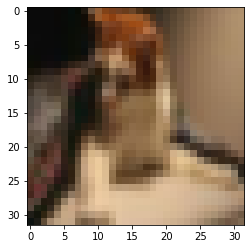

This is not an adversarial example


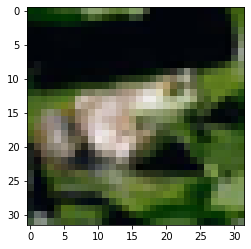

This is not an adversarial example


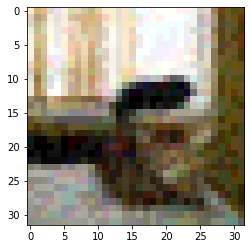

Prediction by model 1 is  2  and Prediction by model 2 is  9  Thus this is an adverserial example


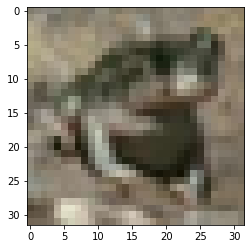

This is not an adversarial example


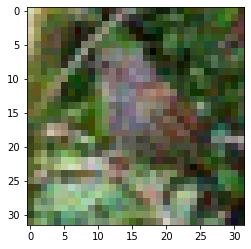

Prediction by model 1 is  2  and Prediction by model 2 is  6  Thus this is an adverserial example


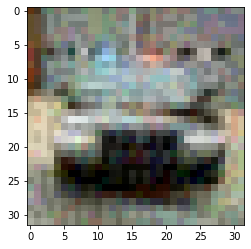

Prediction by model 1 is  1.0  and Prediction by model 2 is  0.33452147  Since the difference b/w prediction is greater than threshold this is an adverserial example


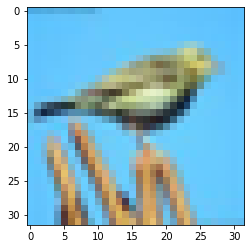

This is not an adversarial example


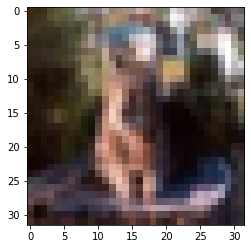

This is not an adversarial example


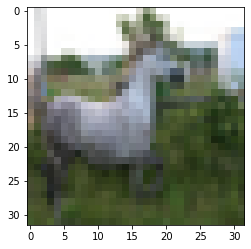

This is not an adversarial example


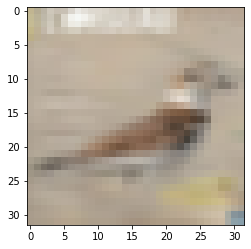

This is not an adversarial example


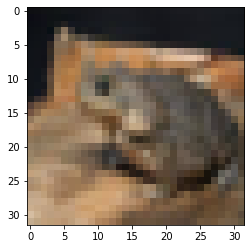

This is not an adversarial example


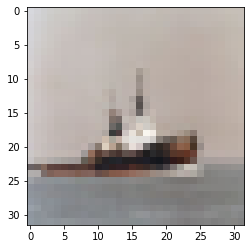

This is not an adversarial example


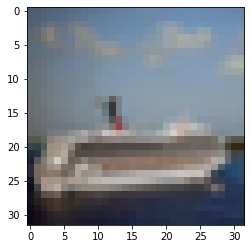

This is not an adversarial example


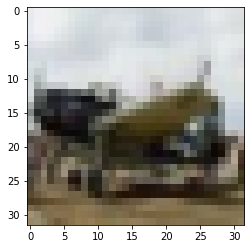

Prediction by model 1 is  0.9417686  and Prediction by model 2 is  0.2004996  Since the difference b/w prediction is greater than threshold this is an adverserial example


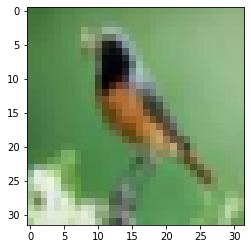

This is not an adversarial example


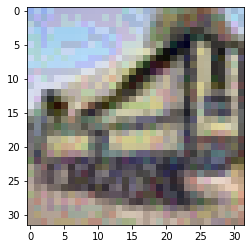

Prediction by model 1 is  1.0  and Prediction by model 2 is  0.27858865  Since the difference b/w prediction is greater than threshold this is an adverserial example


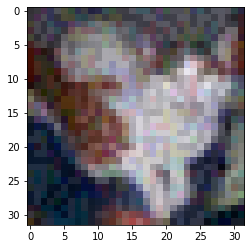

Prediction by model 1 is  3  and Prediction by model 2 is  6  Thus this is an adverserial example


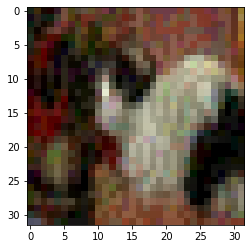

Prediction by model 1 is  3  and Prediction by model 2 is  5  Thus this is an adverserial example


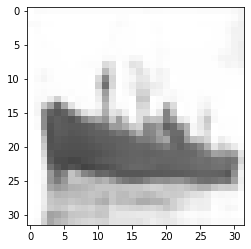

This is not an adversarial example


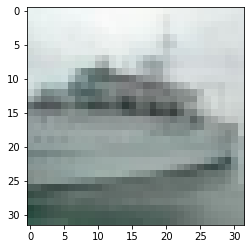

This is not an adversarial example


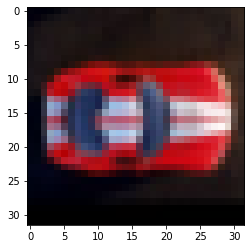

This is not an adversarial example


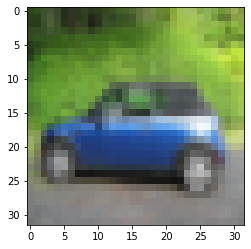

This is not an adversarial example


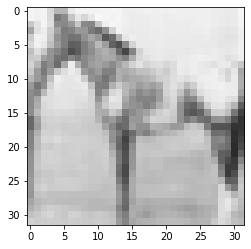

This is not an adversarial example


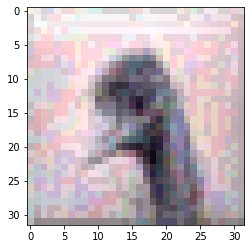

Prediction by model 1 is  2  and Prediction by model 2 is  3  Thus this is an adverserial example


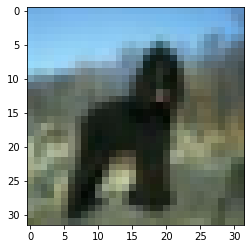

This is not an adversarial example


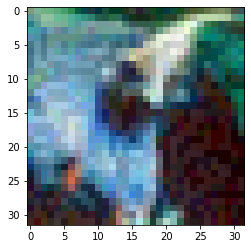

Prediction by model 1 is  2  and Prediction by model 2 is  9  Thus this is an adverserial example


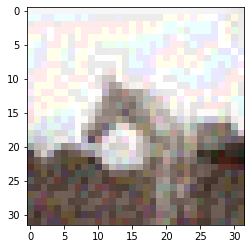

Prediction by model 1 is  3  and Prediction by model 2 is  2  Thus this is an adverserial example


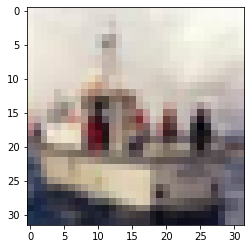

This is not an adversarial example


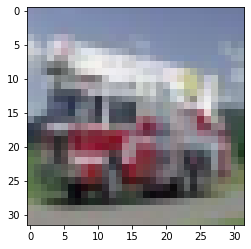

This is not an adversarial example


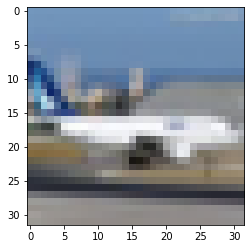

This is not an adversarial example


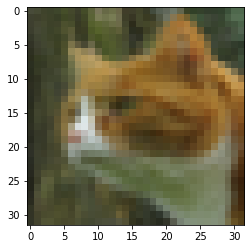

This is not an adversarial example


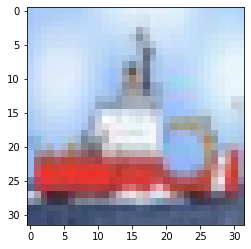

This is not an adversarial example


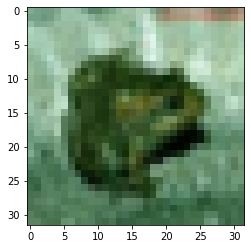

This is not an adversarial example


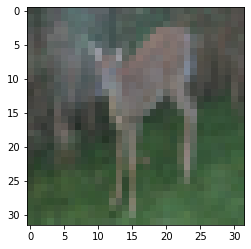

This is not an adversarial example


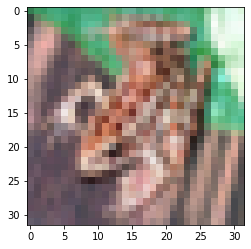

This is not an adversarial example


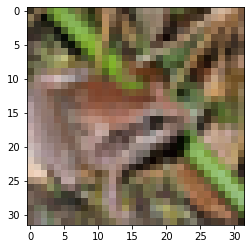

This is not an adversarial example


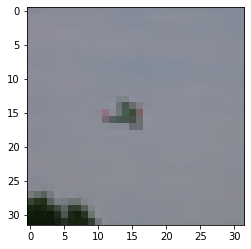

This is not an adversarial example


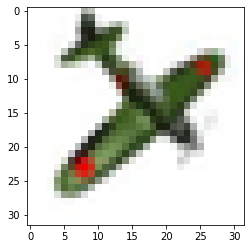

This is not an adversarial example


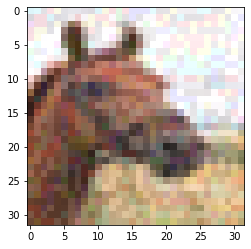

Prediction by model 1 is  4  and Prediction by model 2 is  7  Thus this is an adverserial example


In [ ]:
count=0
for i in range(100):
  a1=model3.predict(adv_test_set_1_cifar[i].reshape(1,32,32,3))
  a2=model4.predict(adv_test_set_1_cifar[i].reshape(1,32,32,3))
  n1=np.argmax(a1)
  n2=np.argmax(a2)
  if n1!=n2:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_cifar[i]))
    plt.show()
    print("Prediction by model 1 is ",n1," and Prediction by model 2 is ",n2," Thus this is an adverserial example")
    
  elif abs(a1[0][n1]-a2[0][n2])>0.65:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_1_cifar[i]))
    plt.show()
    print("Prediction by model 1 is ",a1[0][n1]," and Prediction by model 2 is ",a2[0][n2]," Since the difference b/w prediction is greater than threshold this is an adverserial example")
  else:
    plt.imshow(np.squeeze(x_test1[i]))
    plt.show()
    print("This is not an adversarial example")


In [ ]:
print("The number of adverserial examples in adverserial test set 1 is", count)

The number of adverserial examples in adverserial test set 1 is 20


**Adverserial examples from adverserial test set 2 Cifar**

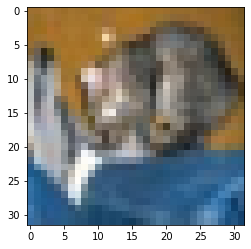

This is not an adversarial example


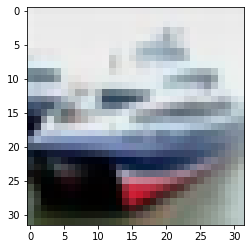

This is not an adversarial example


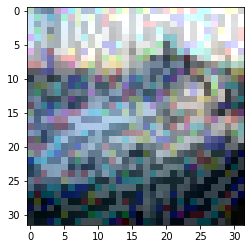

Prediction by model 1 is  3  and Prediction by model 2 is  9  Thus this is an adverserial example


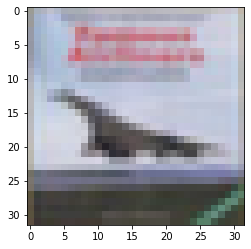

Prediction by model 1 is  0.99976856  and Prediction by model 2 is  0.21621919  Since the difference b/w prediction is greater than threshold this is an adverserial example


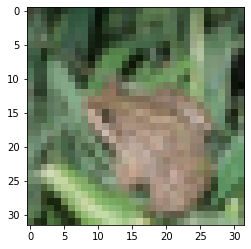

This is not an adversarial example


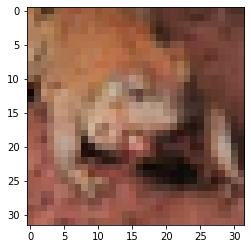

This is not an adversarial example


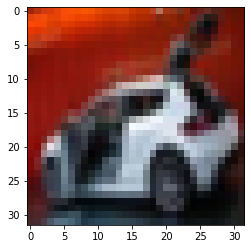

This is not an adversarial example


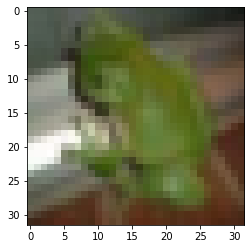

This is not an adversarial example


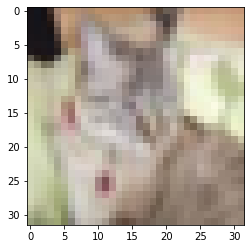

This is not an adversarial example


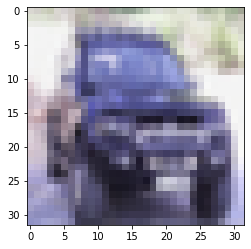

This is not an adversarial example


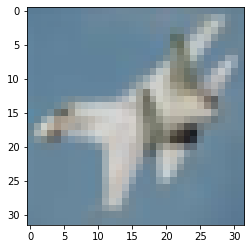

This is not an adversarial example


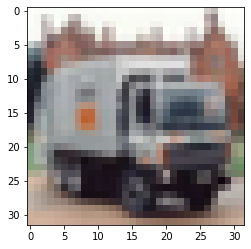

This is not an adversarial example


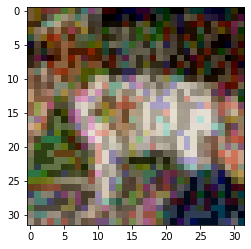

Prediction by model 1 is  4  and Prediction by model 2 is  6  Thus this is an adverserial example


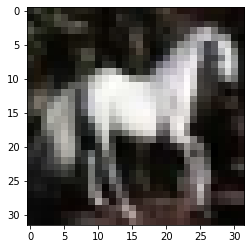

This is not an adversarial example


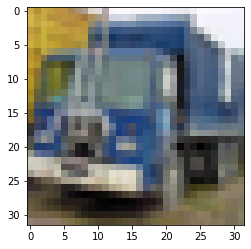

This is not an adversarial example


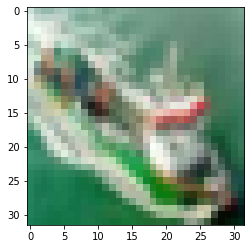

This is not an adversarial example


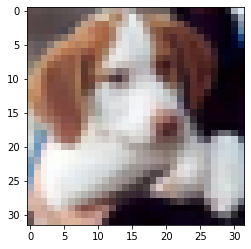

This is not an adversarial example


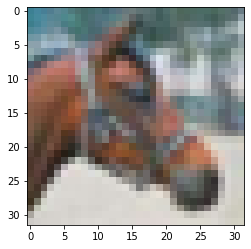

This is not an adversarial example


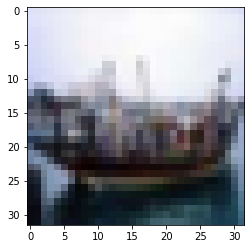

This is not an adversarial example


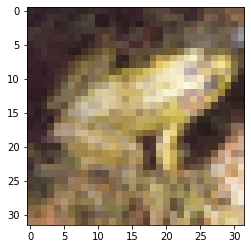

This is not an adversarial example


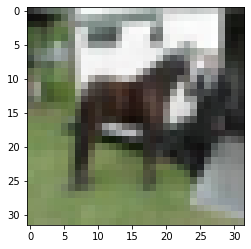

This is not an adversarial example


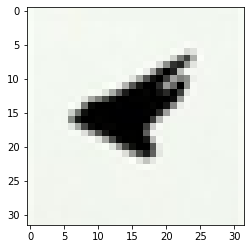

This is not an adversarial example


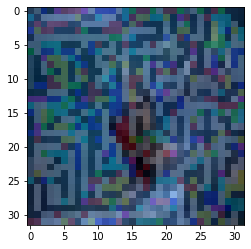

Prediction by model 1 is  9  and Prediction by model 2 is  2  Thus this is an adverserial example


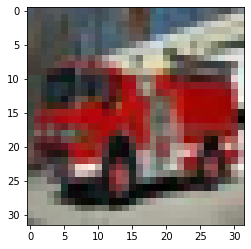

This is not an adversarial example


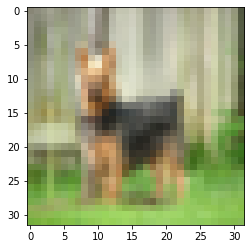

This is not an adversarial example


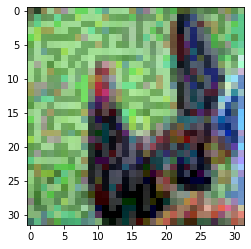

Prediction by model 1 is  9  and Prediction by model 2 is  3  Thus this is an adverserial example


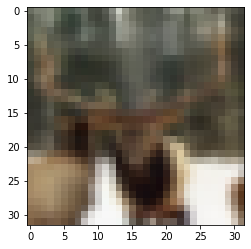

This is not an adversarial example


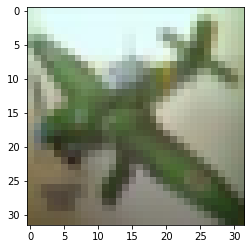

This is not an adversarial example


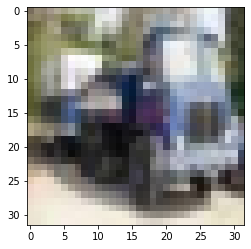

This is not an adversarial example


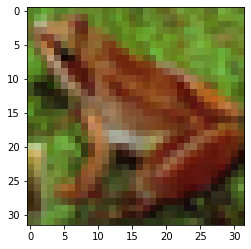

This is not an adversarial example


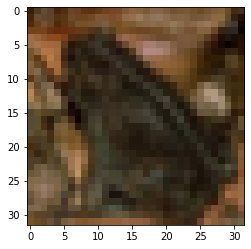

This is not an adversarial example


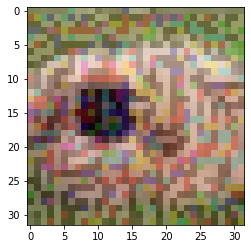

Prediction by model 1 is  5  and Prediction by model 2 is  2  Thus this is an adverserial example


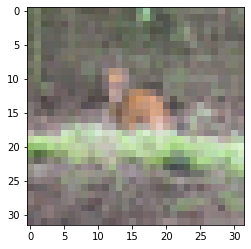

This is not an adversarial example


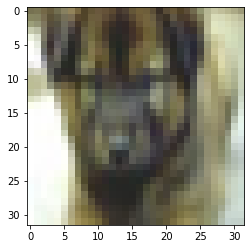

This is not an adversarial example


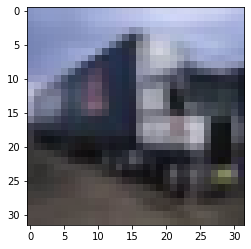

This is not an adversarial example


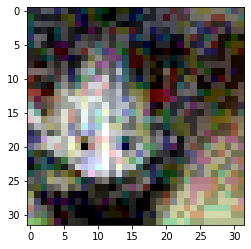

Prediction by model 1 is  3  and Prediction by model 2 is  8  Thus this is an adverserial example


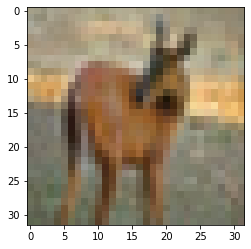

This is not an adversarial example


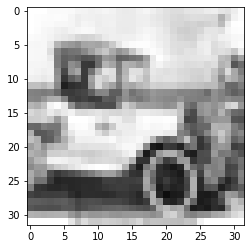

This is not an adversarial example


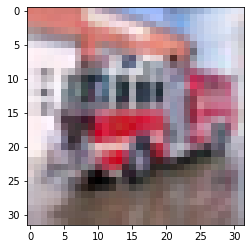

This is not an adversarial example


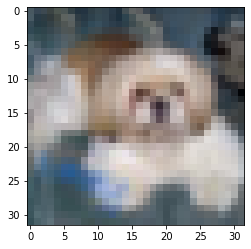

This is not an adversarial example


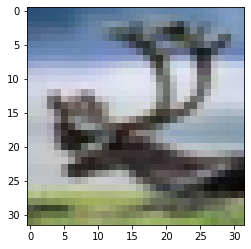

This is not an adversarial example


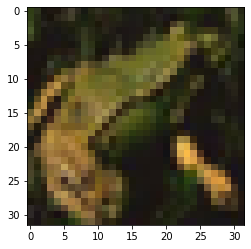

This is not an adversarial example


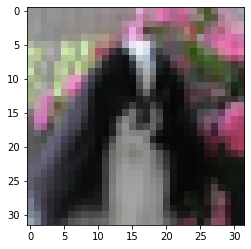

This is not an adversarial example


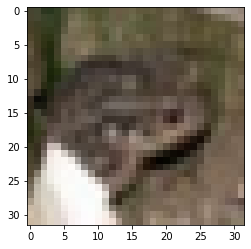

This is not an adversarial example


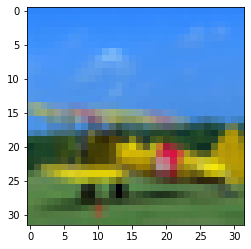

This is not an adversarial example


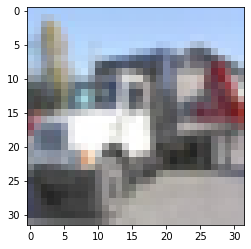

This is not an adversarial example


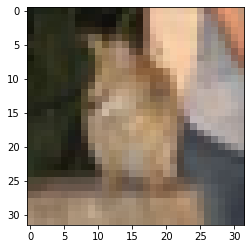

This is not an adversarial example


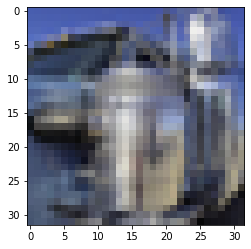

This is not an adversarial example


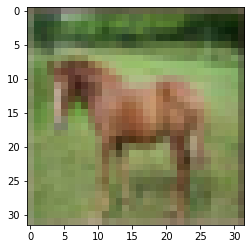

Prediction by model 1 is  7  and Prediction by model 2 is  4  Thus this is an adverserial example


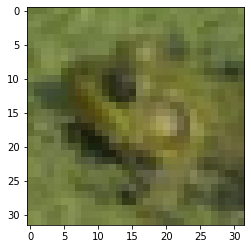

This is not an adversarial example


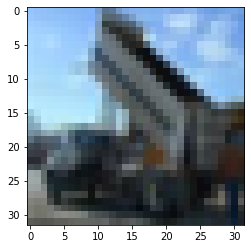

This is not an adversarial example


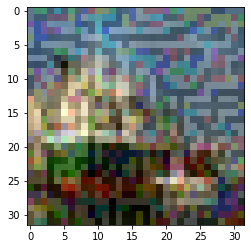

Prediction by model 1 is  8  and Prediction by model 2 is  9  Thus this is an adverserial example


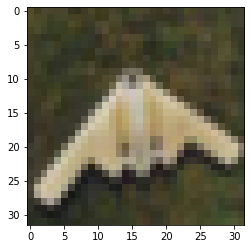

Prediction by model 1 is  7  and Prediction by model 2 is  2  Thus this is an adverserial example


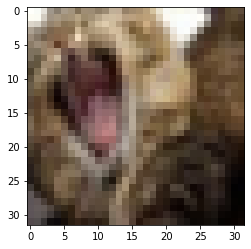

This is not an adversarial example


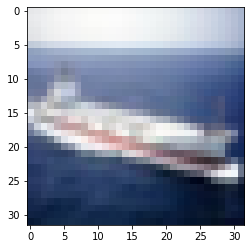

This is not an adversarial example


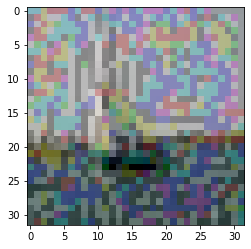

Prediction by model 1 is  8  and Prediction by model 2 is  9  Thus this is an adverserial example


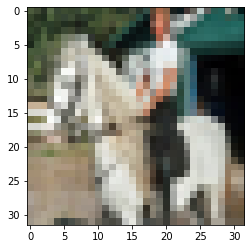

This is not an adversarial example


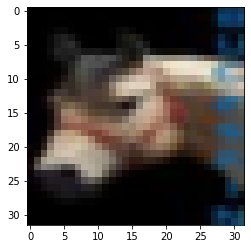

This is not an adversarial example


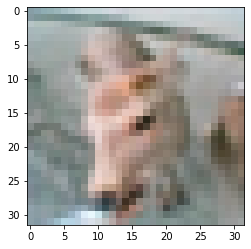

This is not an adversarial example


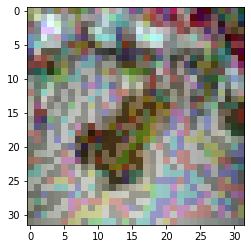

Prediction by model 1 is  6  and Prediction by model 2 is  3  Thus this is an adverserial example


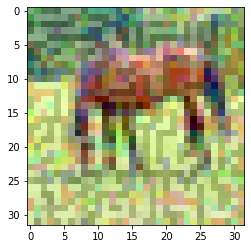

Prediction by model 1 is  7  and Prediction by model 2 is  4  Thus this is an adverserial example


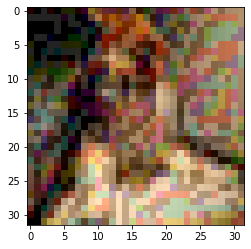

Prediction by model 1 is  5  and Prediction by model 2 is  4  Thus this is an adverserial example


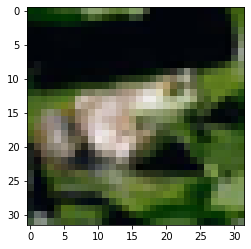

This is not an adversarial example


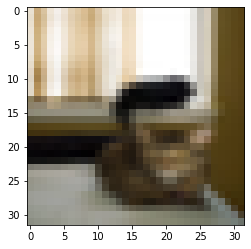

This is not an adversarial example


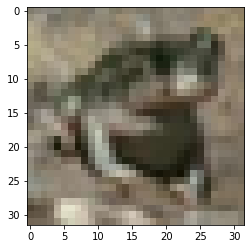

This is not an adversarial example


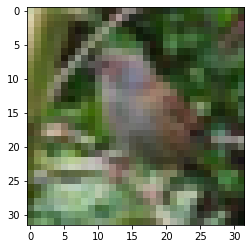

This is not an adversarial example


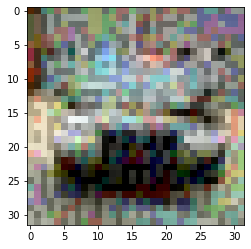

Prediction by model 1 is  1  and Prediction by model 2 is  9  Thus this is an adverserial example


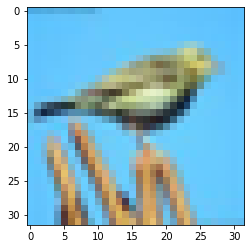

This is not an adversarial example


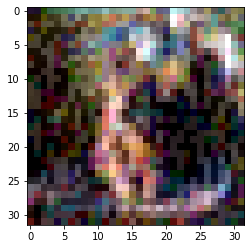

Prediction by model 1 is  5  and Prediction by model 2 is  3  Thus this is an adverserial example


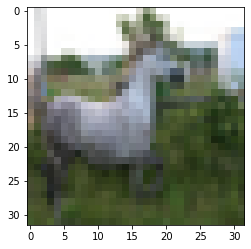

This is not an adversarial example


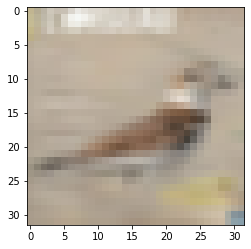

This is not an adversarial example


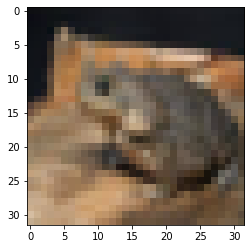

This is not an adversarial example


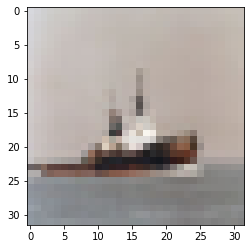

This is not an adversarial example


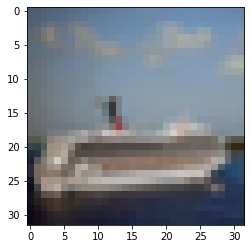

This is not an adversarial example


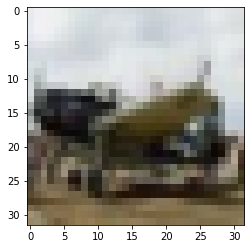

Prediction by model 1 is  0.9417686  and Prediction by model 2 is  0.2004996  Since the difference b/w prediction is greater than threshold this is an adverserial example


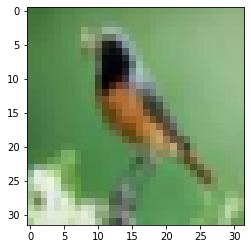

This is not an adversarial example


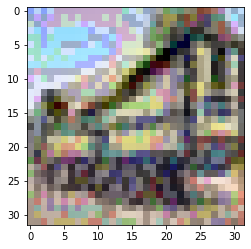

Prediction by model 1 is  1.0  and Prediction by model 2 is  0.22545174  Since the difference b/w prediction is greater than threshold this is an adverserial example


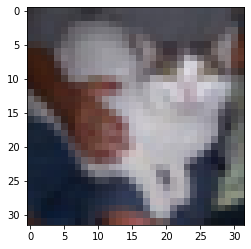

This is not an adversarial example


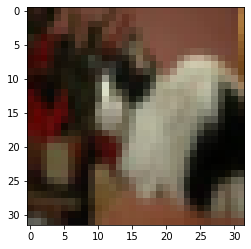

This is not an adversarial example


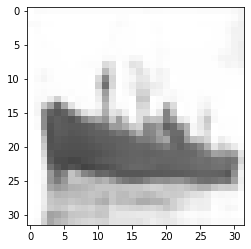

This is not an adversarial example


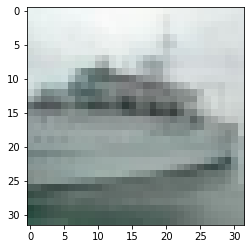

This is not an adversarial example


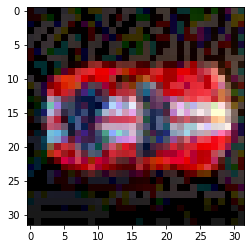

Prediction by model 1 is  1  and Prediction by model 2 is  9  Thus this is an adverserial example


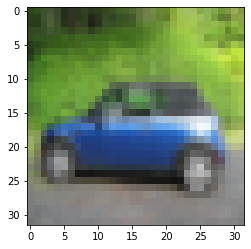

This is not an adversarial example


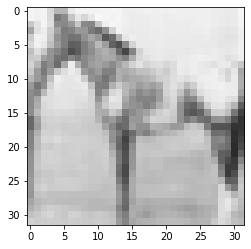

This is not an adversarial example


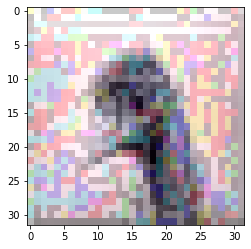

Prediction by model 1 is  2  and Prediction by model 2 is  3  Thus this is an adverserial example


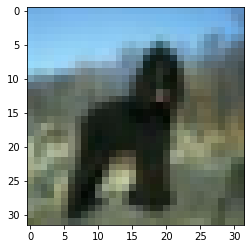

This is not an adversarial example


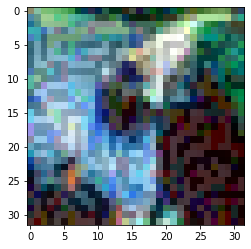

Prediction by model 1 is  7  and Prediction by model 2 is  9  Thus this is an adverserial example


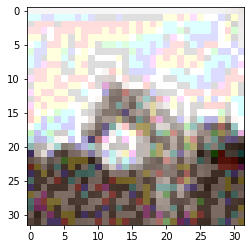

Prediction by model 1 is  6  and Prediction by model 2 is  4  Thus this is an adverserial example


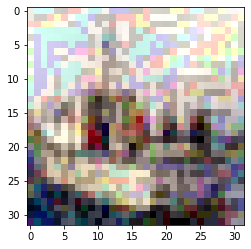

Prediction by model 1 is  8  and Prediction by model 2 is  3  Thus this is an adverserial example


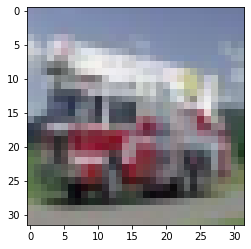

This is not an adversarial example


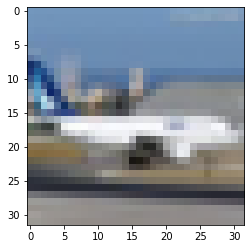

This is not an adversarial example


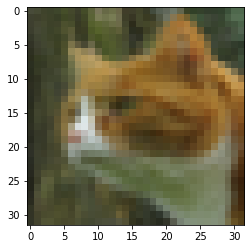

This is not an adversarial example


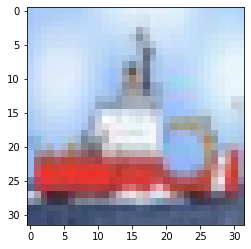

This is not an adversarial example


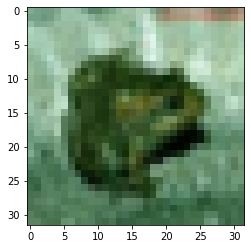

This is not an adversarial example


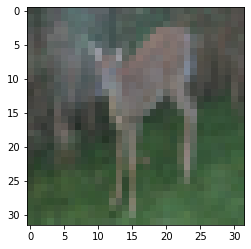

This is not an adversarial example


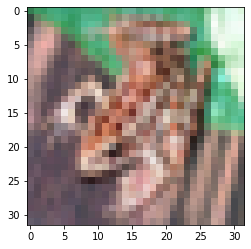

This is not an adversarial example


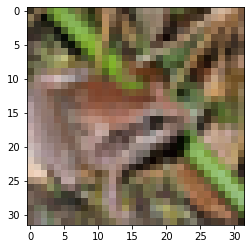

This is not an adversarial example


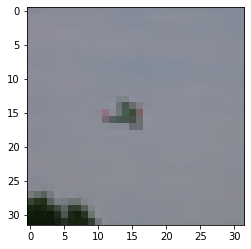

This is not an adversarial example


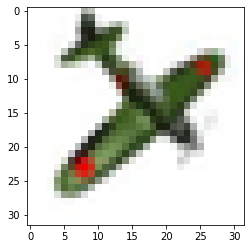

This is not an adversarial example


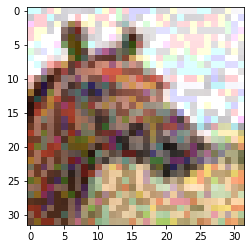

Prediction by model 1 is  4  and Prediction by model 2 is  7  Thus this is an adverserial example


In [ ]:
count=0
for i in range(100):
  a1=model3.predict(adv_test_set_2_cifar[i].reshape(1,32,32,3))
  a2=model4.predict(adv_test_set_2_cifar[i].reshape(1,32,32,3))
  n1=np.argmax(a1)
  n2=np.argmax(a2)
  if n1!=n2:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_2_cifar[i]))
    plt.show()
    print("Prediction by model 1 is ",n1," and Prediction by model 2 is ",n2," Thus this is an adverserial example")
    
  elif abs(a1[0][n1]-a2[0][n2])>0.65:
    count=count+1
    plt.imshow(np.squeeze(adv_test_set_2_cifar[i]))
    plt.show()
    print("Prediction by model 1 is ",a1[0][n1]," and Prediction by model 2 is ",a2[0][n2]," Since the difference b/w prediction is greater than threshold this is an adverserial example")
  else:
    plt.imshow(np.squeeze(x_test1[i]))
    plt.show()
    print("This is not an adversarial example")


In [ ]:
print("The number of adverserial examples in adverserial test set 2 is", count)

The number of adverserial examples in adverserial test set 2 is 24


**Custom Image Selection**<br>
Modify i for selecting image 


This image is not an adverserial example


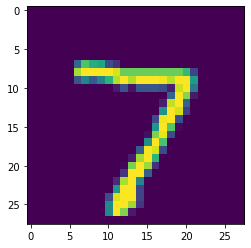

In [ ]:
#MNIST Image Selection
i=0

a1=model1.predict(x_test[i].reshape(1,28,28,1))
a2=model2.predict(x_test[i].reshape(1,28,28,1))
n1=np.argmax(a1)
n2=np.argmax(a2)
if n1!=n2:
  print("This Image is an Adverserial example because prediction are difference")
elif abs(a1[0][n1]-a2[0][n2])>0.05:
  print("This image is an Adverserial Example because prediction difference is more than threshold")
else:
  print("This image is not an adverserial example")
plt.imshow(np.squeeze(x_test[i]))

This image is an Adverserial Example because prediction difference is more than threshold


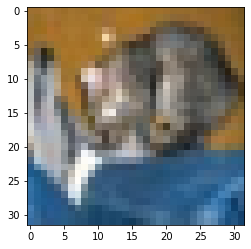

In [ ]:
#CIFAR Image Selection
i=0

a1=model3.predict(x_test1[i].reshape(1,32,32,3))
a2=model4.predict(x_test1[i].reshape(1,32,32,3))
n1=np.argmax(a1)
n2=np.argmax(a2)
if n1!=n2:
  print("This Image is an Adverserial example because  prediction are difference")
elif abs(a1[0][n1]-a2[0][n2])>0.65:
  print("This image is an Adverserial Example because prediction difference is more than threshold")
else:
  print("This image is not an adverserial example")
plt.imshow(np.squeeze(x_test1[i]))